<a href="https://colab.research.google.com/github/ZeyuWu2001/The-Bidirectional-Relationship-between-Emotional-Change-and-Physical-Movement-Activities/blob/Data-Description/Data_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package

In [ ]:
pip install scikit-mobility googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 640.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
import os
import random
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from geopy.distance import great_circle
import networkx as nx
from tqdm import tqdm
from geopy.distance import geodesic
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from folium.plugins import HeatMap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.neighbors import NearestNeighbors
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import os
import skmob
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from tqdm import tqdm
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
from shapely.geometry import Point, LineString

In [ ]:
from skmob import TrajDataFrame
from skmob.preprocessing import detection, clustering
from skmob.measures.individual import jump_lengths
from skmob.measures.individual import radius_of_gyration
from skmob.preprocessing import filtering, compression
from skmob.measures.collective import visits_per_location
from skmob.utils.gislib import getDistanceByHaversine
from skmob.measures.collective import homes_per_location
from skmob.measures.individual import home_location
from skmob.measures.individual import jump_lengths, waiting_times, number_of_locations
from skmob.measures.individual import max_distance_from_home, distance_straight_line, maximum_distance
from skmob.measures.individual import individual_mobility_network
from skmob.measures.individual import max_distance_from_home

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-Processing

In [ ]:
participants_file = "/content/drive/MyDrive/Research/UTokyo/PSM/participants.tsv"
participant = pd.read_csv(participants_file, sep='\t')
participant.drop(columns=['Unnamed: 0'], inplace=True)

locations_file = "/content/drive/MyDrive/Research/UTokyo/PSM/locations.tsv"
location = pd.read_csv(locations_file, sep='\t')
location.drop(columns=['Unnamed: 0'], inplace=True)

emotion_file = "/content/drive/MyDrive/Research/UTokyo/PSM/survey_emotion.tsv"
emotion = pd.read_csv(emotion_file, sep='\t')
emotion.drop(columns=['Unnamed: 0'], inplace=True)

weather_file = "/content/drive/MyDrive/Research/UTokyo/PSM/weather.tsv"
weather = pd.read_csv(weather_file, sep='\t')
weather.drop(columns=['Unnamed: 0'], inplace=True)

pedometer_file = "/content/drive/MyDrive/Research/UTokyo/PSM/pedometer.tsv"
pedometer = pd.read_csv(pedometer_file, sep='\t')
pedometer.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Convert date column to datetime
location['datetime'] = pd.to_datetime(location['datetime'])

# Filter participants dataframe to keep only rows with device IDs present in locations
locations_device_ids = set(location['device_id'].unique())
participants_filtered = participant[participant['device_id'].isin(locations_device_ids)]
participant = participants_filtered
participant = participant.drop_duplicates(subset='device_id')

In [ ]:
print(location.date.unique())
print(location.device_id.nunique())
print(participant.device_id.nunique())
print(location.shape)
print(participant.shape)

['2024-02-19' '2024-02-20' '2024-02-21' '2024-02-22' '2024-02-23'
 '2024-02-24' '2024-02-25']
130
130
(388436, 11)
(130, 31)


In [ ]:
participant.device_id.nunique()

130

# Merge & Filter

In [ ]:
class EmotionStepAnalyzer:
    def __init__(self, participants, weather, pedometer, location, emotion):
        self.participants = participants
        self.weather = weather
        self.pedometer = pedometer
        self.location = location
        self.emotion = emotion
        self.merged_data = None

    def convert_to_datetime(self, df, column_name):
        df[column_name] = pd.to_datetime(df[column_name], errors='coerce', utc=True)
        df = df.dropna(subset=[column_name])  # Drop rows where conversion failed
        return df

    def preprocess_data(self):
        self.weather = self.convert_to_datetime(self.weather[['device_id', 'datetime', 'weather_icon_id', 'timestamp']], 'datetime')
        self.pedometer = self.convert_to_datetime(self.pedometer[['device_id', 'datetime', 'number_of_steps', 'timestamp']], 'datetime')
        self.location = self.convert_to_datetime(self.location[['device_id', 'datetime', 'latitude', 'longitude', 'timestamp']], 'datetime')
        self.emotion = self.convert_to_datetime(self.emotion[['device_id', 'datetime', 'valence', 'arousal']], 'datetime')

    def determine_date_range(self):
        start_date = min(self.weather['datetime'].min(), self.pedometer['datetime'].min(),
                         self.location['datetime'].min(), self.emotion['datetime'].min())
        end_date = max(self.weather['datetime'].max(), self.pedometer['datetime'].max(),
                       self.location['datetime'].max(), self.emotion['datetime'].max())
        return pd.date_range(start=start_date, end=end_date, freq=self.interval)

    def resample_and_interpolate(self, df, datetime_col, date_range):
        df.set_index(datetime_col, inplace=True)
        resampled_list = []
        for device_id, group in df.groupby('device_id'):
            group_resampled = group.resample(self.interval).mean(numeric_only=True)
            group_resampled = group_resampled.reindex(date_range, method='nearest', level=0)
            group_resampled['device_id'] = device_id
            group_resampled = group_resampled.fillna(method='ffill').fillna(method='bfill').interpolate(method='time').reset_index()
            resampled_list.append(group_resampled)
        df_resampled = pd.concat(resampled_list, ignore_index=True)
        df_resampled.rename(columns={'index': datetime_col}, inplace=True)
        return df_resampled

    def calculate_distance_within_intervals(self, df):
        df = df.sort_values('datetime')
        df['prev_latitude'] = df['latitude'].shift(1)
        df['prev_longitude'] = df['longitude'].shift(1)
        df['distance'] = df.apply(
            lambda row: geodesic((row['latitude'], row['longitude']), (row['prev_latitude'], row['prev_longitude'])).meters
            if pd.notnull(row['prev_latitude']) and pd.notnull(row['prev_longitude']) else 0, axis=1)
        return df

    def classify_emotional_state(self, row):
        if row['valence'] > 0 and row['arousal'] > 0:
            return 'pos'
        elif row['valence'] < 0 and row['arousal'] < 0:
            return 'neg'
        elif row['valence'] == 0 and row['arousal'] == 0:
            return 'stable'
        else:
            return 'neutral'

    def classify_emotional_change(self, row):
        if row['prev_emotional_state'] == 'neg' and row['emotional_state'] == 'stable':
            return 'up'
        elif row['prev_emotional_state'] == 'stable' and row['emotional_state'] == 'pos':
            return 'up'
        elif row['prev_emotional_state'] == 'neg' and row['emotional_state'] == 'pos':
            return 'up'
        elif row['prev_emotional_state'] == 'stable' and row['emotional_state'] == 'neg':
            return 'down'
        elif row['prev_emotional_state'] == 'pos' and row['emotional_state'] == 'stable':
            return 'down'
        elif row['prev_emotional_state'] == 'pos' and row['emotional_state'] == 'neg':
            return 'down'
        elif row['prev_emotional_state'] == row['emotional_state']:
            return 'stable'
        else:
            return 'neutral'

    def classify_emotional_change_binary(self, row):
        return 1 if row in ['up', 'down'] else 0

    def prepare_data(self, interval='H'):
        self.interval = interval
        self.preprocess_data()
        date_range = self.determine_date_range()

        user_weather_resampled = self.resample_and_interpolate(self.weather, 'datetime', date_range)
        user_step_resampled = self.resample_and_interpolate(self.pedometer, 'datetime', date_range)
        user_location_resampled = self.resample_and_interpolate(self.location, 'datetime', date_range)
        user_location_resampled = user_location_resampled.groupby('device_id').apply(self.calculate_distance_within_intervals)

        user_emotion_resampled = self.resample_and_interpolate(self.emotion, 'datetime', date_range)
        user_emotion_resampled['emotional_state'] = user_emotion_resampled.apply(self.classify_emotional_state, axis=1)
        user_emotion_resampled['prev_emotional_state'] = user_emotion_resampled.groupby('device_id')['emotional_state'].shift(1)
        user_emotion_resampled['emotional_change'] = user_emotion_resampled.apply(self.classify_emotional_change, axis=1)
        user_emotion_resampled['emotional_change_binary'] = user_emotion_resampled['emotional_change'].apply(self.classify_emotional_change_binary)

        self.merged_data = self.participants.merge(user_location_resampled, on='device_id').merge(
            user_emotion_resampled, on=['device_id', 'datetime']).merge(
            user_step_resampled, on=['device_id', 'datetime']).merge(
            user_weather_resampled, on=['device_id', 'datetime'])

        self.merged_data = self.merged_data[self.merged_data['emotional_change'].isin(['up', 'down', 'stable'])]
        self.merged_data['emotional_change_binary'] = self.merged_data['emotional_change'].apply(self.classify_emotional_change_binary)

        # Define commuting status
        office_freq_mapping = {
            '出社しない（=全て在宅勤務）': 'WFH',
            '週に5回以上': '5 times a week',
            '週に4回': '4 times a week',
            '週に3回': '3 times a week',
            '週に2回': 'twice a week',
            '週に1回': 'once a week',
            '月に1回': 'once a month',
            'その他': 'other'
        }
        self.merged_data['office'] = self.merged_data['office'].map(office_freq_mapping)

        # Define age groups
        self.merged_data['age_group'] = pd.cut(self.merged_data['age'], bins=[0, 14, 17, 24, 35, 45, 65, float('inf')], labels=['Minor', 'Young Youth', 'Middle Youth', 'Elder Youth', 'Middle Ages', 'Elder Ages', 'Elders'])

        # Define region groups
        location_mapping = {
            '神奈川県': 'Urban',
            '東京都': 'Urban',
            '大阪府': 'Urban',
            '京都府': 'Urban',
            '福岡県': 'Urban',
            '静岡県': 'Rural',
            '愛知県': 'Rural',
            '北海道': 'Rural',
            '富山県': 'Rural',
            '福島県': 'Rural',
            '熊本県': 'Rural',
            '栃木県': 'Rural',
            '佐賀県': 'Rural',
            '滋賀県': 'Rural',
            '高知県': 'Rural',
            '奈良県': 'Rural',
            '千葉県': 'Rural',
            '埼玉県': 'Rural',
            '新潟県': 'Rural',
            '三重県': 'Rural',
            '宮城県': 'Rural',
            '石川県': 'Rural',
            '兵庫県': 'Rural',
            '広島県': 'Rural',
            '沖縄県': 'Rural',
            '群馬県': 'Rural',
            '岡山県': 'Rural',
            '秋田県': 'Rural',
            '茨城県': 'Rural',
            '長野県': 'Rural',
            '愛媛県': 'Rural',
            '青森県': 'Rural',
            '鹿児島県': 'Rural'
        }
        self.merged_data['region'] = self.merged_data['location'].map(location_mapping)

        number_of_children_mapping = {
            '0人': '0',
            '1人': '1',
            '2人': '2',
            '3人': '3',
            '4人以上': '4'
        }
        self.merged_data['number_of_children'] = self.merged_data['number_of_children'].map(number_of_children_mapping)

        # Define education groups
        education_mapping = {
            '高校卒業': 'lower edu',
            '大学卒業': 'higher edu',
            '専門学校卒業': 'lower edu',
            '大学院（修士課程）卒業': 'higher edu',
            '短期大学卒業': 'lower edu',
            'その他': 'lower edu'
        }
        self.merged_data['education'] = self.merged_data['education'].map(education_mapping)

        # Define gender groups
        gender_mapping = {
            '男性': 'Male',
            '女性': 'Female'
        }
        self.merged_data['gender'] = self.merged_data['gender'].map(gender_mapping)

        # Ensure necessary columns for analysis
        self.merged_data = self.merged_data.dropna(subset=['longitude', 'latitude', 'number_of_steps', 'distance', 'emotional_change'])

        return self.merged_data

    def plot_data(self, num_users=10):
        # Set random seed for reproducibility
        random.seed(100)

        # Select random unique device IDs
        selected_users = random.sample(list(self.merged_data['device_id'].unique()), num_users)

        # Filter the data for the selected users
        filtered_data = self.merged_data[self.merged_data['device_id'].isin(selected_users)]

        # Plot steps, distance, longitude, latitude, valence, and arousal over time in subplots
        fig, axs = plt.subplots(6, 1, figsize=(12, 22), sharex=True)

        # Plot steps over time
        for device_id, group in filtered_data.groupby('device_id'):
            axs[0].plot(group['datetime'], group['number_of_steps'], label=f'{device_id}', alpha=0.7)
        axs[0].set_title('Steps Over Time')
        axs[0].set_ylabel('Number of Steps')

        # Plot distance over time
        for device_id, group in filtered_data.groupby('device_id'):
            axs[1].plot(group['datetime'], group['distance'], label=f'{device_id}', alpha=0.7)
        axs[1].set_title('Distance Over Time')
        axs[1].set_ylabel('Distance (meters)')

        # Plot longitude over time
        for device_id, group in filtered_data.groupby('device_id'):
            axs[2].plot(group['datetime'], group['longitude'], label=f'{device_id}', alpha=0.7)
        axs[2].set_title('Longitude Over Time')
        axs[2].set_ylabel('Longitude')

        # Plot latitude over time
        for device_id, group in filtered_data.groupby('device_id'):
            axs[3].plot(group['datetime'], group['latitude'], label=f'{device_id}', alpha=0.7)
        axs[3].set_title('Latitude Over Time')
        axs[3].set_ylabel('Latitude')

        # Plot valence over time
        for device_id, group in filtered_data.groupby('device_id'):
            axs[4].plot(group['datetime'], group['valence'], label=f'{device_id}', alpha=0.7)
        axs[4].set_title('Valence Over Time')
        axs[4].set_ylabel('Valence')

        # Plot arousal over time
        for device_id, group in filtered_data.groupby('device_id'):
            axs[5].plot(group['datetime'], group['arousal'], label=f'{device_id}', alpha=0.7)
        axs[5].set_title('Arousal Over Time')
        axs[5].set_ylabel('Arousal')
        axs[5].set_xlabel('Time')

        # Add the legend outside the plots
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(selected_users))

        plt.tight_layout()
        plt.show()

<ipython-input-9-79cb2285d977>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_datetime(df[column_name], errors='coerce', utc=True)
<ipython-input-9-79cb2285d977>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_datetime(df[column_name], errors='coerce', utc=True)
<ipython-input-9-79cb2285d977>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

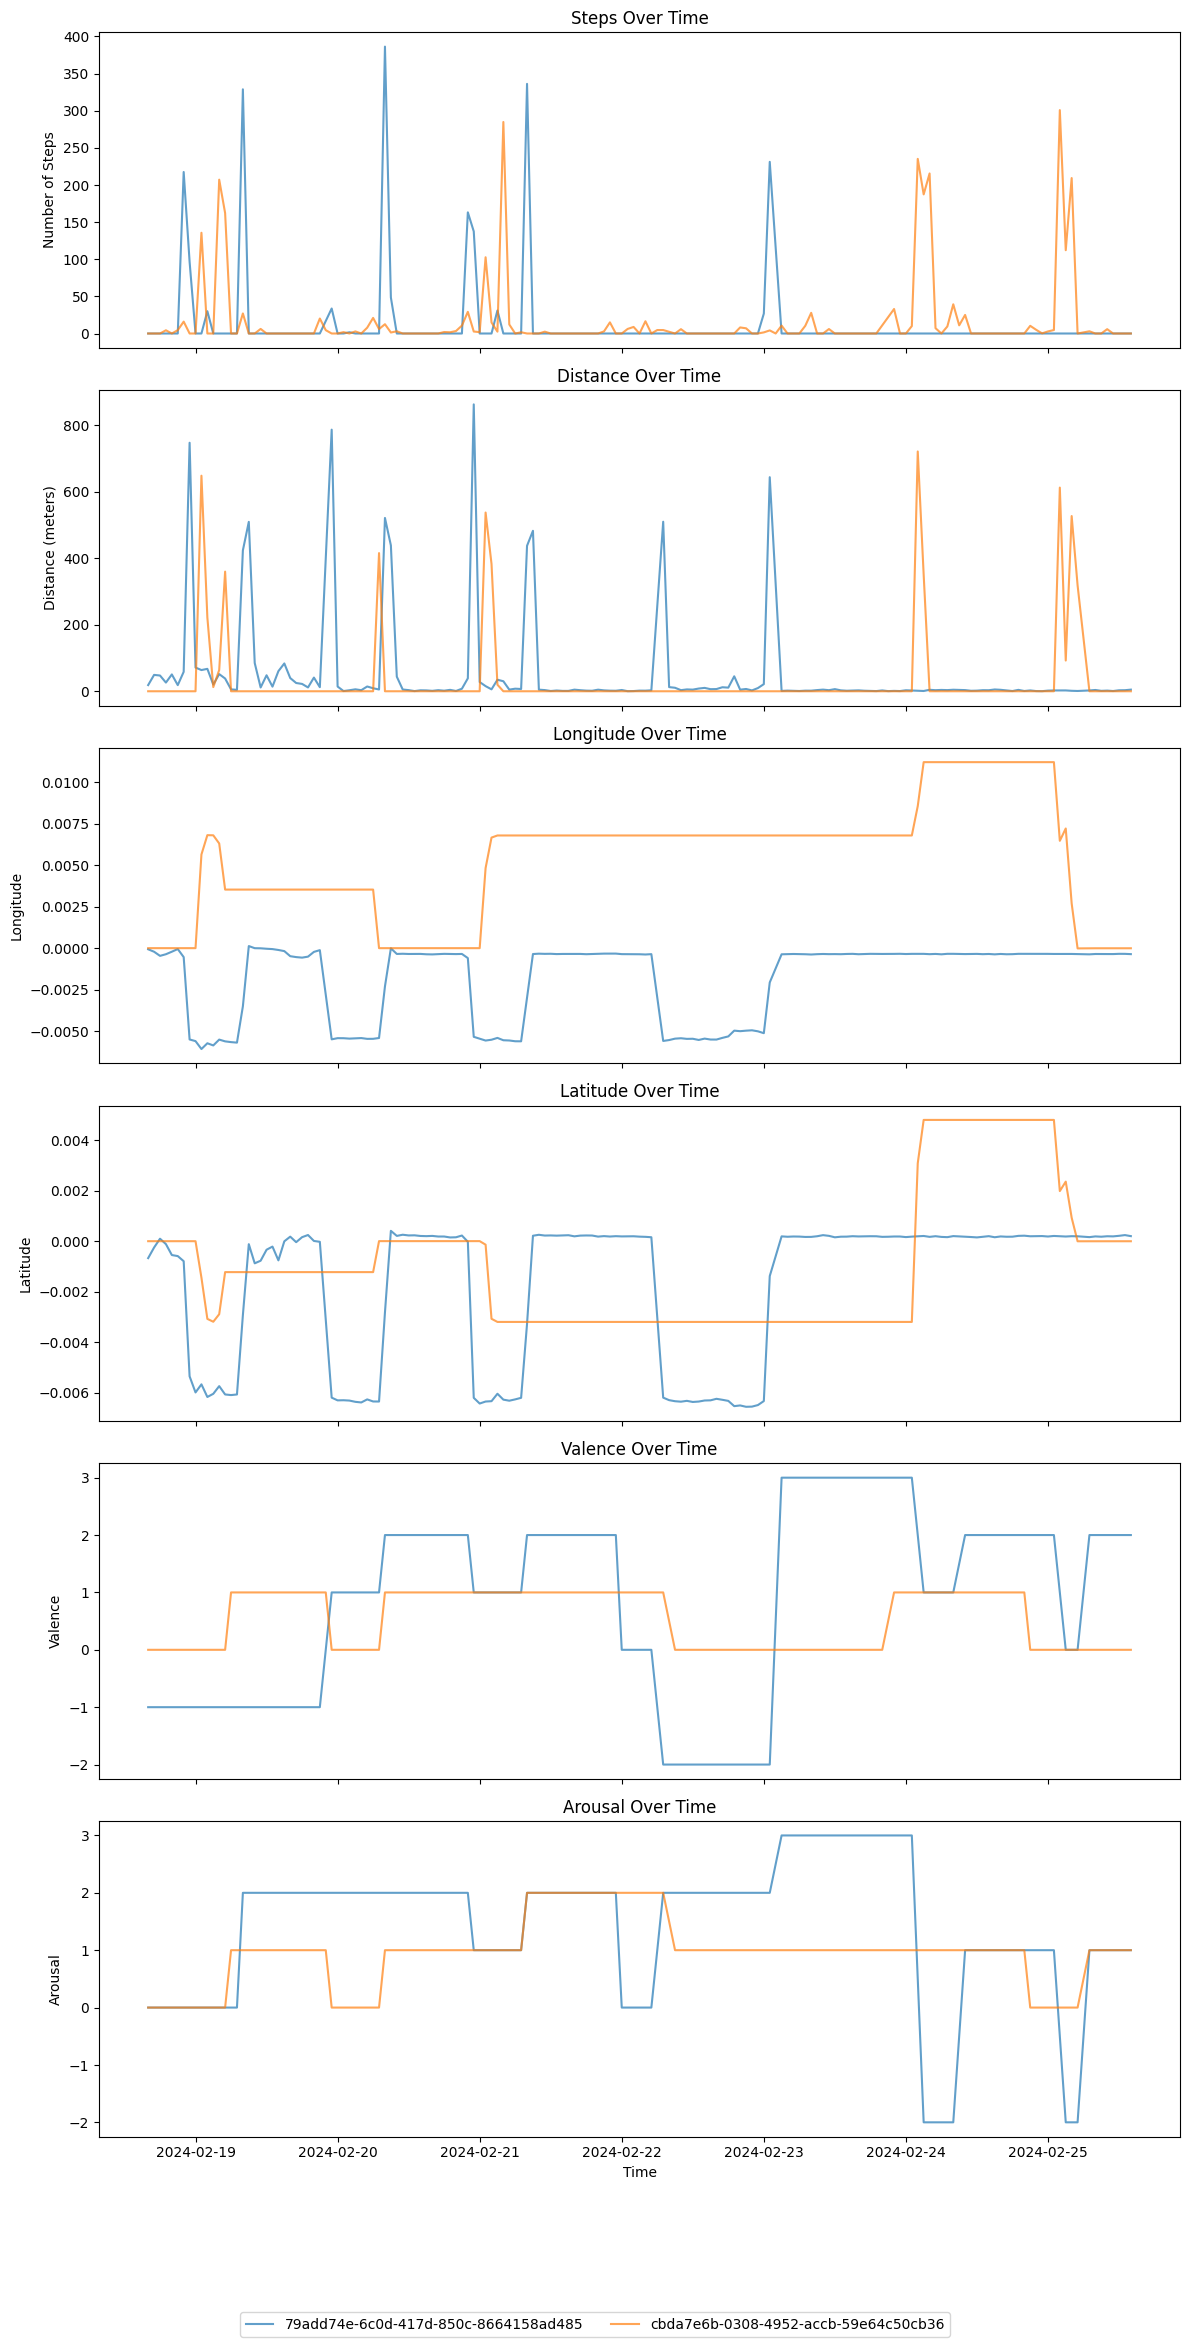

In [ ]:
analyzer = EmotionStepAnalyzer(participant, weather, pedometer, location, emotion)
merged_data = analyzer.prepare_data(interval='H') # Set the interval ('H' for hourly, '12H' for 12-hourly, 'D' for daily)
analyzer.plot_data(num_users=2)  # Set the number of users to plot

In [ ]:
merged_data = merged_data[['device_id', 'age', 'location',
              'commutation', 'commutation_method',
              'job', 'nurture', 'office', 'gender', 'age_group', 'region', 'education', 'number_of_children',
              'datetime', 'timestamp', 'timestamp_x', 'timestamp_y',
              'latitude', 'longitude', 'prev_latitude', 'prev_longitude',
              'valence', 'arousal', 'emotional_state', 'prev_emotional_state',
              'number_of_steps',
              'distance']]

In [ ]:
Filter_ID = merged_data.device_id.unique()
location = location[location['device_id'].isin(Filter_ID)]
participant = participant[participant['device_id'].isin(Filter_ID)]
emotion = emotion[emotion['device_id'].isin(Filter_ID)]
pedometer = pedometer[pedometer['device_id'].isin(Filter_ID)]
weather = weather[weather['device_id'].isin(Filter_ID)]

In [ ]:
print(location.date.unique())
print(location.device_id.nunique())
print(participant.device_id.nunique())

['2024-02-19' '2024-02-20' '2024-02-21' '2024-02-22' '2024-02-23'
 '2024-02-24' '2024-02-25']
123
123


# Description

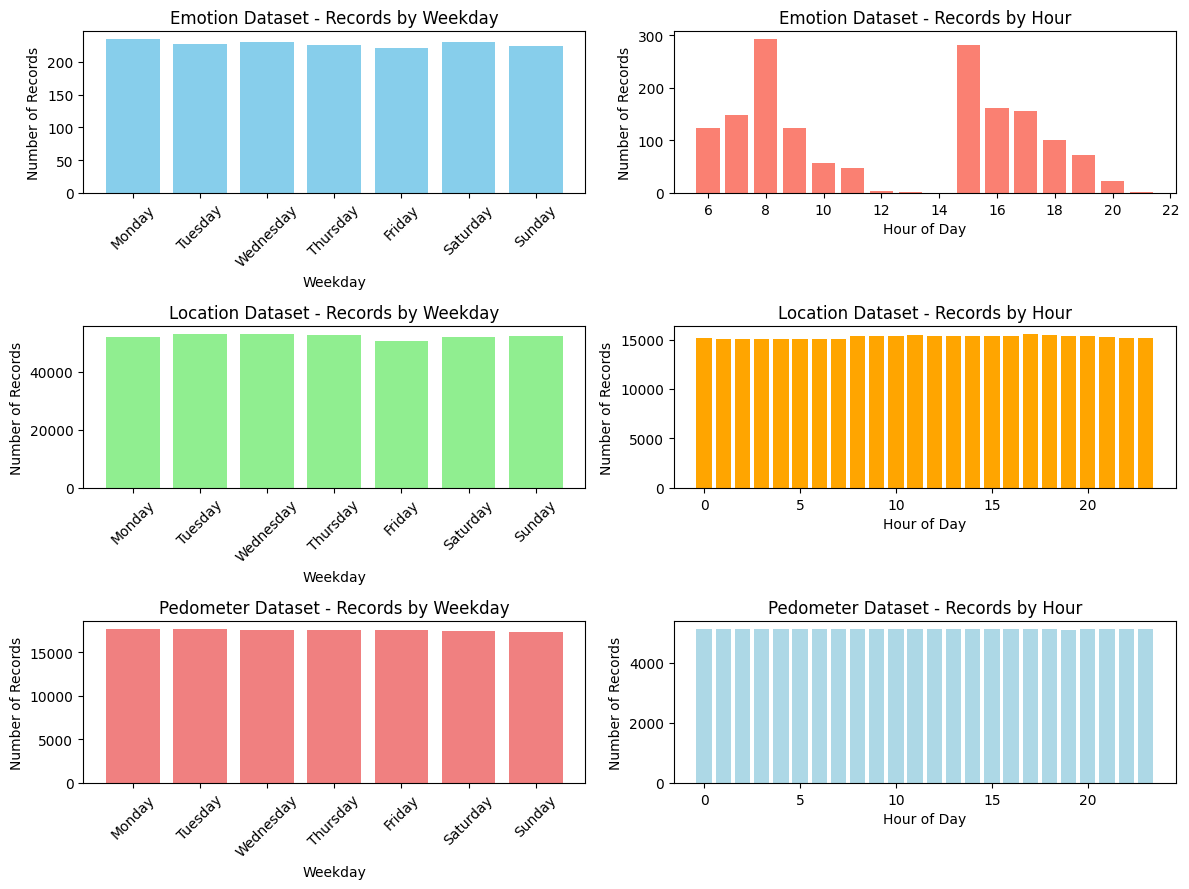

In [ ]:
# Define the correct order for days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert datetime to pandas datetime format
emotion['datetime'] = pd.to_datetime(emotion['datetime'])
location['datetime'] = pd.to_datetime(location['datetime'])
pedometer['datetime'] = pd.to_datetime(pedometer['datetime'])

# Extract the day of the week as a categorical type with a specified order
emotion['weekday'] = pd.Categorical(emotion['datetime'].dt.day_name(), categories=day_order, ordered=True)
location['weekday'] = pd.Categorical(location['datetime'].dt.day_name(), categories=day_order, ordered=True)
pedometer['weekday'] = pd.Categorical(pedometer['datetime'].dt.day_name(), categories=day_order, ordered=True)

# Group by weekday ensuring the order
emotion_by_weekday = emotion.groupby('weekday').size()
location_by_weekday = location.groupby('weekday').size()
pedometer_by_weekday = pedometer.groupby('weekday').size()

# Group by hour for each dataset
emotion_by_hour = emotion.groupby(emotion['datetime'].dt.hour).size()
location_by_hour = location.groupby(location['datetime'].dt.hour).size()
pedometer_by_hour = pedometer.groupby(pedometer['datetime'].dt.hour).size()

# Create subplots with Weekday labels
fig, axs = plt.subplots(3, 2, figsize=(12, 9))

# Subplot 1: Emotion dataset - Records by Weekday
axs[0, 0].bar(emotion_by_weekday.index, emotion_by_weekday.values, color='skyblue')
axs[0, 0].set_title('Emotion Dataset - Records by Weekday')
axs[0, 0].set_ylabel('Number of Records')
axs[0, 0].set_xlabel('Weekday')
axs[0, 0].tick_params(axis='x', rotation=45)  # Rotate weekday labels

# Subplot 2: Emotion dataset - Records by Hour
axs[0, 1].bar(emotion_by_hour.index, emotion_by_hour.values, color='salmon')
axs[0, 1].set_title('Emotion Dataset - Records by Hour')
axs[0, 1].set_ylabel('Number of Records')
axs[0, 1].set_xlabel('Hour of Day')

# Subplot 3: Location dataset - Records by Weekday
axs[1, 0].bar(location_by_weekday.index, location_by_weekday.values, color='lightgreen')
axs[1, 0].set_title('Location Dataset - Records by Weekday')
axs[1, 0].set_ylabel('Number of Records')
axs[1, 0].set_xlabel('Weekday')
axs[1, 0].tick_params(axis='x', rotation=45)  # Rotate weekday labels

# Subplot 4: Location dataset - Records by Hour
axs[1, 1].bar(location_by_hour.index, location_by_hour.values, color='orange')
axs[1, 1].set_title('Location Dataset - Records by Hour')
axs[1, 1].set_ylabel('Number of Records')
axs[1, 1].set_xlabel('Hour of Day')

# Subplot 5: Pedometer dataset - Records by Weekday
axs[2, 0].bar(pedometer_by_weekday.index, pedometer_by_weekday.values, color='lightcoral')
axs[2, 0].set_title('Pedometer Dataset - Records by Weekday')
axs[2, 0].set_ylabel('Number of Records')
axs[2, 0].set_xlabel('Weekday')
axs[2, 0].tick_params(axis='x', rotation=45)  # Rotate weekday labels

# Subplot 6: Pedometer dataset - Records by Hour
axs[2, 1].bar(pedometer_by_hour.index, pedometer_by_hour.values, color='lightblue')
axs[2, 1].set_title('Pedometer Dataset - Records by Hour')
axs[2, 1].set_ylabel('Number of Records')
axs[2, 1].set_xlabel('Hour of Day')

plt.tight_layout()
plt.show()

## Emotion Trend

<ipython-input-15-cdf6bd6d3021>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=emotion['valence'], y=emotion['arousal'], cmap="Blues", shade=True, bw_adjust=0.5, ax=axs[0])


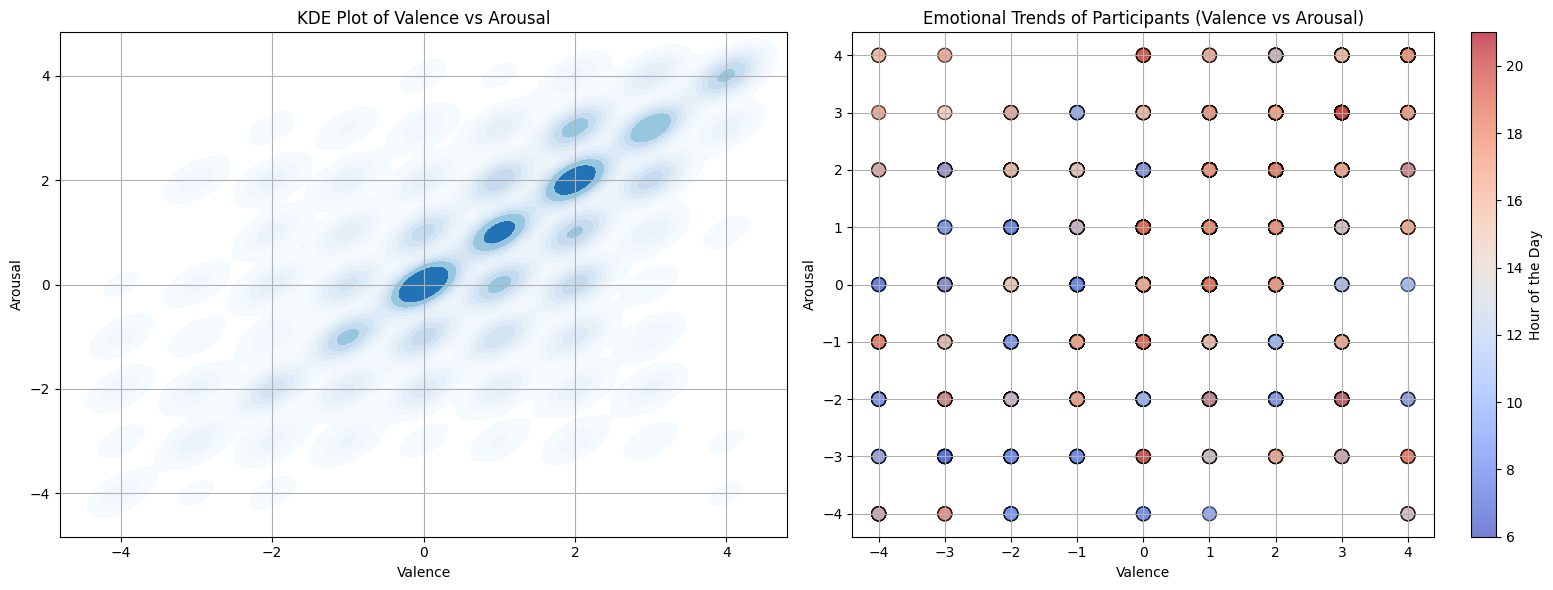

In [ ]:
# Create subplots for KDE and Scatter plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: KDE for Valence and Arousal
sns.kdeplot(x=emotion['valence'], y=emotion['arousal'], cmap="Blues", shade=True, bw_adjust=0.5, ax=axs[0])
axs[0].set_title('KDE Plot of Valence vs Arousal')
axs[0].set_xlabel('Valence')
axs[0].set_ylabel('Arousal')
axs[0].grid(True)

# Subplot 2: Scatter plot for Valence vs Arousal with Hour coloring
# Extract hour of the day from the datetime for color mapping
emotion['hour'] = emotion['datetime'].dt.hour

# Scatter plot for emotional trends
scatter = axs[1].scatter(emotion['valence'], emotion['arousal'], c=emotion['hour'], cmap='coolwarm', s=100, edgecolor='k', alpha=0.7)
axs[1].set_title('Emotional Trends of Participants (Valence vs Arousal)')
axs[1].set_xlabel('Valence')
axs[1].set_ylabel('Arousal')
axs[1].grid(True)

# Add color bar for the hour of the day
cbar = fig.colorbar(scatter, ax=axs[1])
cbar.set_label('Hour of the Day')

# Display the plots
plt.tight_layout()
plt.show()

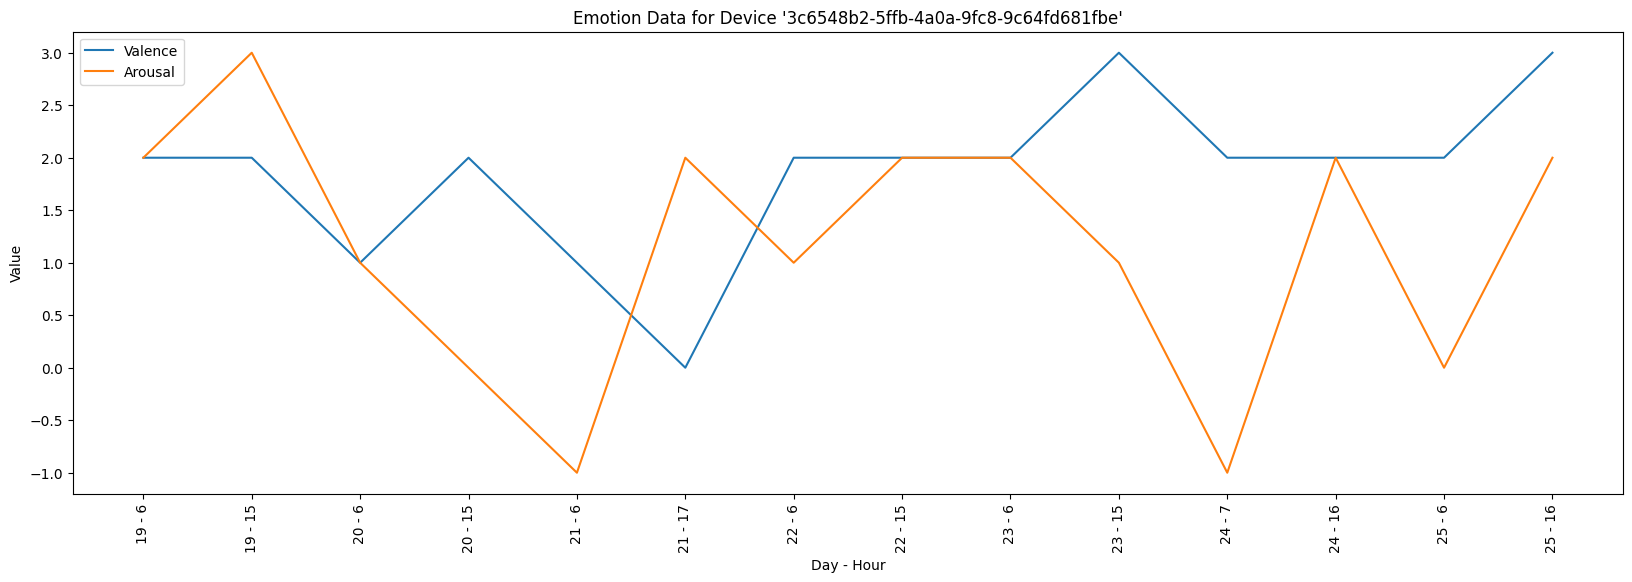

In [ ]:
random.seed(66)

# Assuming emotion['datetime'] is already a datetime object
emotion['day'] = emotion['datetime'].dt.day
emotion['hour'] = emotion['datetime'].dt.hour
emotion['day_hour'] = emotion['day'].astype(str) + ' - ' + emotion['hour'].astype(str)

# Randomly select a device ID
random_device_id = random.choice(emotion['device_id'].unique())

plt.figure(figsize=(20, 6))
plt.plot(emotion[emotion['device_id'] == random_device_id]['day_hour'], emotion[emotion['device_id'] == random_device_id]['valence'], label='Valence')
plt.plot(emotion[emotion['device_id'] == random_device_id]['day_hour'], emotion[emotion['device_id'] == random_device_id]['arousal'], label='Arousal')

plt.xlabel('Day - Hour')
plt.ylabel('Value')
plt.title(f"Emotion Data for Device '{random_device_id}'")
plt.legend()

plt.xticks(rotation=90)
plt.show()

## Step Trend

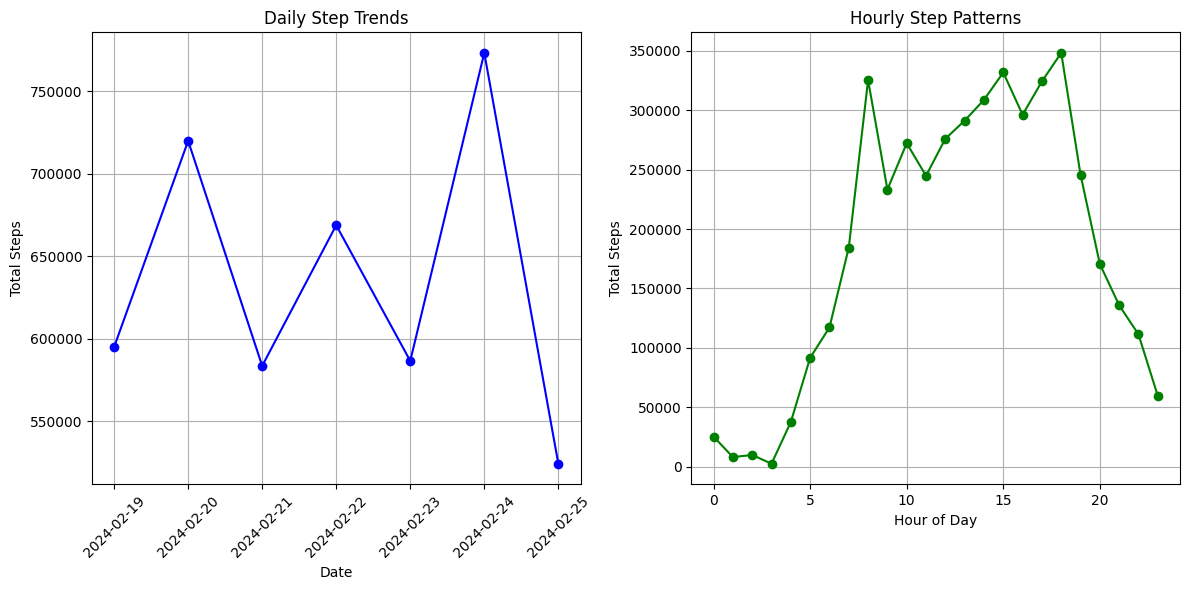

In [ ]:
# 1. Daily Step Trends
daily_steps = pedometer.groupby('date')['number_of_steps'].sum()

# 2. Hourly Step Patterns
hourly_steps = pedometer.groupby(pedometer['datetime'].dt.hour)['number_of_steps'].sum()

# Plotting the trends
plt.figure(figsize=(12, 6))

# Subplot 1: Daily Step Trends
plt.subplot(1, 2, 1)
plt.plot(daily_steps.index, daily_steps.values, marker='o', color='b')
plt.title('Daily Step Trends')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)
plt.grid(True)

# Subplot 2: Hourly Step Patterns
plt.subplot(1, 2, 2)
plt.plot(hourly_steps.index, hourly_steps.values, marker='o', color='g')
plt.title('Hourly Step Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Total Steps')
plt.grid(True)

plt.tight_layout()
plt.show()

# Create Subgroup & Translate

In [ ]:
merged_df = pd.merge(location, participant[['device_id', 'age', 'location', 'gender', 'job', 'office', 'family', 'nurture', 'education', 'number_of_children']], on='device_id', how='left')
merged_df.shape

(366064, 21)

In [ ]:
# Gender Group
gender_mapping = {
            '男性': 'Male',
            '女性': 'Female'
        }
merged_df['gender'] = merged_df['gender'].map(gender_mapping)
participant['gender'] = participant['gender'].map(gender_mapping)

Male = merged_df[merged_df['gender'] == 'Male']
Female = merged_df[merged_df['gender'] == 'Female']

# Work Communting Group
office_freq_mapping = {
    '出社しない（=全て在宅勤務）': 'WFH',
    '週に5回以上': '5 times a week',
    '週に4回': '4 times a week',
    '週に3回': '3 times a week',
    '週に2回': 'twice a week',
    '週に1回': 'once a week',
    '月に1回': 'once a month',
    'その他': 'other'
}

merged_df['office'] = merged_df['office'].map(office_freq_mapping)
participant['office'] = participant['office'].map(office_freq_mapping)

WFH = merged_df[merged_df['office'] == 'WFH']
five_times = merged_df[merged_df['office'] == '5 times a week']
four_times = merged_df[merged_df['office'] == '4 times a week']
three_times = merged_df[merged_df['office'] == '3 times a week']
two_times = merged_df[merged_df['office'] == 'twice a month']
one_time = merged_df[merged_df['office'] == 'once a week']
one_month = merged_df[merged_df['office'] == 'once a month']
other_communting = merged_df[merged_df['office'] == 'other']

# Job Status Group Mapping
job_status_mapping = {
    '自営業': 'Self-employed',
    '会社員': 'Company employee',
    '公務員': 'Government employee',
    'パート・アルバイト': 'Part-time job',
    '学生': 'Student',
    '無職': 'Unemployed',
    'その他': 'Other'
}
merged_df['job'] = merged_df['job'].map(job_status_mapping)
participant['job'] = participant['job'].map(job_status_mapping)

self_employed = merged_df[merged_df['job'] == 'Self-employed']
company_employee = merged_df[merged_df['job'] == 'Company employee']
government_employee = merged_df[merged_df['job'] == 'Government employee']
part_time_job = merged_df[merged_df['job'] == 'Part-time job']
student = merged_df[merged_df['job'] == 'Student']
unemployed = merged_df[merged_df['job'] == 'Unemployed']
other_job = merged_df[merged_df['job'] == 'Other']

# Location Group
region_mapping = {
                '神奈川県': 'Urban',
                '東京都': 'Urban',
                '大阪府': 'Urban',
                '京都府': 'Urban',
                '静岡県': 'Rural',
                '愛知県': 'Rural',
                '北海道': 'Rural',
                '富山県': 'Rural',
                '福島県': 'Rural',
                '熊本県': 'Rural',
                '栃木県': 'Rural',
                '福岡県': 'Rural',
                '佐賀県': 'Rural',
                '滋賀県': 'Rural',
                '高知県': 'Rural',
                '奈良県': 'Rural',
                '千葉県': 'Rural',
                '埼玉県': 'Rural',
                '新潟県': 'Rural',
                '三重県': 'Rural',
                '宮城県': 'Rural',
                '石川県': 'Rural',
                '兵庫県': 'Rural',
                '広島県': 'Rural',
                '沖縄県': 'Rural',
                '群馬県': 'Rural',
                '岡山県': 'Rural',
                '秋田県': 'Rural',
                '茨城県': 'Rural',
                '長野県': 'Rural',
                '愛媛県': 'Rural',
                '青森県': 'Rural',
                '鹿児島県': 'Rural'
            }
merged_df['region'] = merged_df['location'].map(region_mapping)
participant['region'] = participant['location'].map(region_mapping)

Urban = merged_df[merged_df['region'] == 'Urban']
Rural = merged_df[merged_df['region'] == 'Rural']

location_mapping = {
    '京都府': 'Kinki',
    '大阪府': 'Kinki',
    '東京都': 'Kanto',
    '神奈川県': 'Kanto',
    '静岡県': 'Tokai',
    '愛知県': 'Tokai',
    '北海道': 'Hokkaido',
    '富山県': 'Chubu',
    '福島県': 'Tohoku',
    '熊本県': 'Kyushu',
    '栃木県': 'Kanto',
    '福岡県': 'Kyushu',
    '佐賀県': 'Kyushu',
    '滋賀県': 'Kinki',
    '高知県': 'Shikoku',
    '奈良県': 'Kinki',
    '千葉県': 'Kanto',
    '埼玉県': 'Kanto',
    '新潟県': 'Chubu',
    '三重県': 'Kinki',
    '宮城県': 'Tohoku',
    '鹿児島県': 'Kyushu',
    '石川県': 'Chubu',
    '兵庫県': 'Kinki',
    '広島県': 'Chugoku',
    '沖縄県': 'Okinawa',
    '群馬県': 'Kanto',
    '岡山県': 'Chugoku',
    '秋田県': 'Tohoku',
    '茨城県': 'Kanto',
    '長野県': 'Chubu',
    '愛媛県': 'Shikoku',
    '青森県': 'Tohoku'
}
merged_df['location'] = merged_df['location'].map(location_mapping)
participant['location'] = participant['location'].map(location_mapping)

number_of_children_mapping = {
            '0人': '0',
            '1人': '1',
            '2人': '2',
            '3人': '3',
            '4人以上': '4'
        }
merged_df['number_of_children'] = merged_df['number_of_children'].map(number_of_children_mapping)
participant['number_of_children'] = participant['number_of_children'].map(number_of_children_mapping)

# Define education groups
education_mapping = {
            '高校卒業': 'lower edu',
            '大学卒業': 'higher edu',
            '専門学校卒業': 'lower edu',
            '大学院（修士課程）卒業': 'higher edu',
            '短期大学卒業': 'lower edu',
            'その他': 'lower edu'
        }
merged_df['education'] = merged_df['education'].map(education_mapping)
participant['education'] = participant['education'].map(education_mapping)

# Family Status Group
family_status_mapping = {
    'その他': 'Other',
    '一人暮らし': 'Living alone',
    '子供@親': 'Child with parents',
    '配偶者': 'Spouse',
    '親': 'Parents',
    '配偶者@子供': 'Spouse with children',
    '配偶者@子供@親': 'Spouse with children and parents',
    '子供': 'Children',
    '兄弟姉妹': 'Siblings',
    '親@兄弟姉妹': 'Parents with siblings'
}
merged_df['family'] = merged_df['family'].map(family_status_mapping)
participant['family'] = participant['family'].map(family_status_mapping)

# Nurture Status Group
nurture_status_mapping = {
    '子供は居ない': 'No children',
    '利用していない': 'Not using',
    '利用している': 'Using'
}
merged_df['nurture'] = merged_df['nurture'].map(nurture_status_mapping)
participant['nurture'] = participant['nurture'].map(nurture_status_mapping)

# Age Group
merged_df['age_group'] = pd.cut(merged_df['age'], bins=[0, 14, 17, 24, 35, 45, 65, float('inf')],
                                labels=['Minor', 'Young Youth', 'Middle Youth', 'Elder Youth', 'Middle Ages', 'Elder Ages', 'Elders'])
participant['age_group'] = pd.cut(participant['age'], bins=[0, 14, 17, 24, 35, 45, 65, float('inf')],
                                  labels=['Minor', 'Young Youth', 'Middle Youth', 'Elder Youth', 'Middle Ages', 'Elder Ages', 'Elders'])

# Grouping based on revised age groups
Minor = merged_df[merged_df['age_group'] == 'Minor']
Young_youth = merged_df[merged_df['age_group'] == 'Young Youth']
Middle_youth = merged_df[merged_df['age_group'] == 'Middle Youth']
Elder_youth = merged_df[merged_df['age_group'] == 'Elder Youth']
Middle_ages = merged_df[merged_df['age_group'] == 'Middle Ages']
Elder_ages = merged_df[merged_df['age_group'] == 'Elder Ages']
Elders = merged_df[merged_df['age_group'] == 'Elders']

<ipython-input-19-5bbeeec1c2a1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant['gender'] = participant['gender'].map(gender_mapping)
<ipython-input-19-5bbeeec1c2a1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant['office'] = participant['office'].map(office_freq_mapping)
<ipython-input-19-5bbeeec1c2a1>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

# Trend

In [ ]:
print(merged_df.age_group.unique())
print(merged_df.job.unique())
print(merged_df.office.unique())
print(merged_df.family.unique())
print(merged_df.nurture.unique())
print(merged_df.region.unique())

['Middle Ages', 'Elder Youth', 'Middle Youth', 'Elder Ages']
Categories (7, object): ['Minor' < 'Young Youth' < 'Middle Youth' < 'Elder Youth' < 'Middle Ages' <
                         'Elder Ages' < 'Elders']
['Self-employed' 'Company employee' 'Student' 'Part-time job' 'Unemployed'
 'Government employee' 'Other']
['WFH' '5 times a week' 'once a week' 'twice a week' 'other'
 '4 times a week' '3 times a week' 'once a month']
['Other' 'Living alone' 'Child with parents' 'Spouse' 'Parents'
 'Spouse with children' 'Spouse with children and parents' 'Children'
 'Siblings' 'Parents with siblings']
['No children' 'Not using' 'Using']
['Rural' 'Urban']


In [ ]:
print(merged_df.age_group.value_counts(normalize=False)/len(merged_df))
print(merged_df.region.value_counts(normalize=False)/len(merged_df))
# Middle Youth for ages 18 to 24
# Elder Youth for ages 25 to 35
# Middle Ages for ages 36 to 45
# Elder Ages for ages 46 to 65

Middle Ages     0.376000
Elder Youth     0.308711
Middle Youth    0.201399
Elder Ages      0.113890
Minor           0.000000
Young Youth     0.000000
Elders          0.000000
Name: age_group, dtype: float64
Rural    0.68544
Urban    0.31456
Name: region, dtype: float64


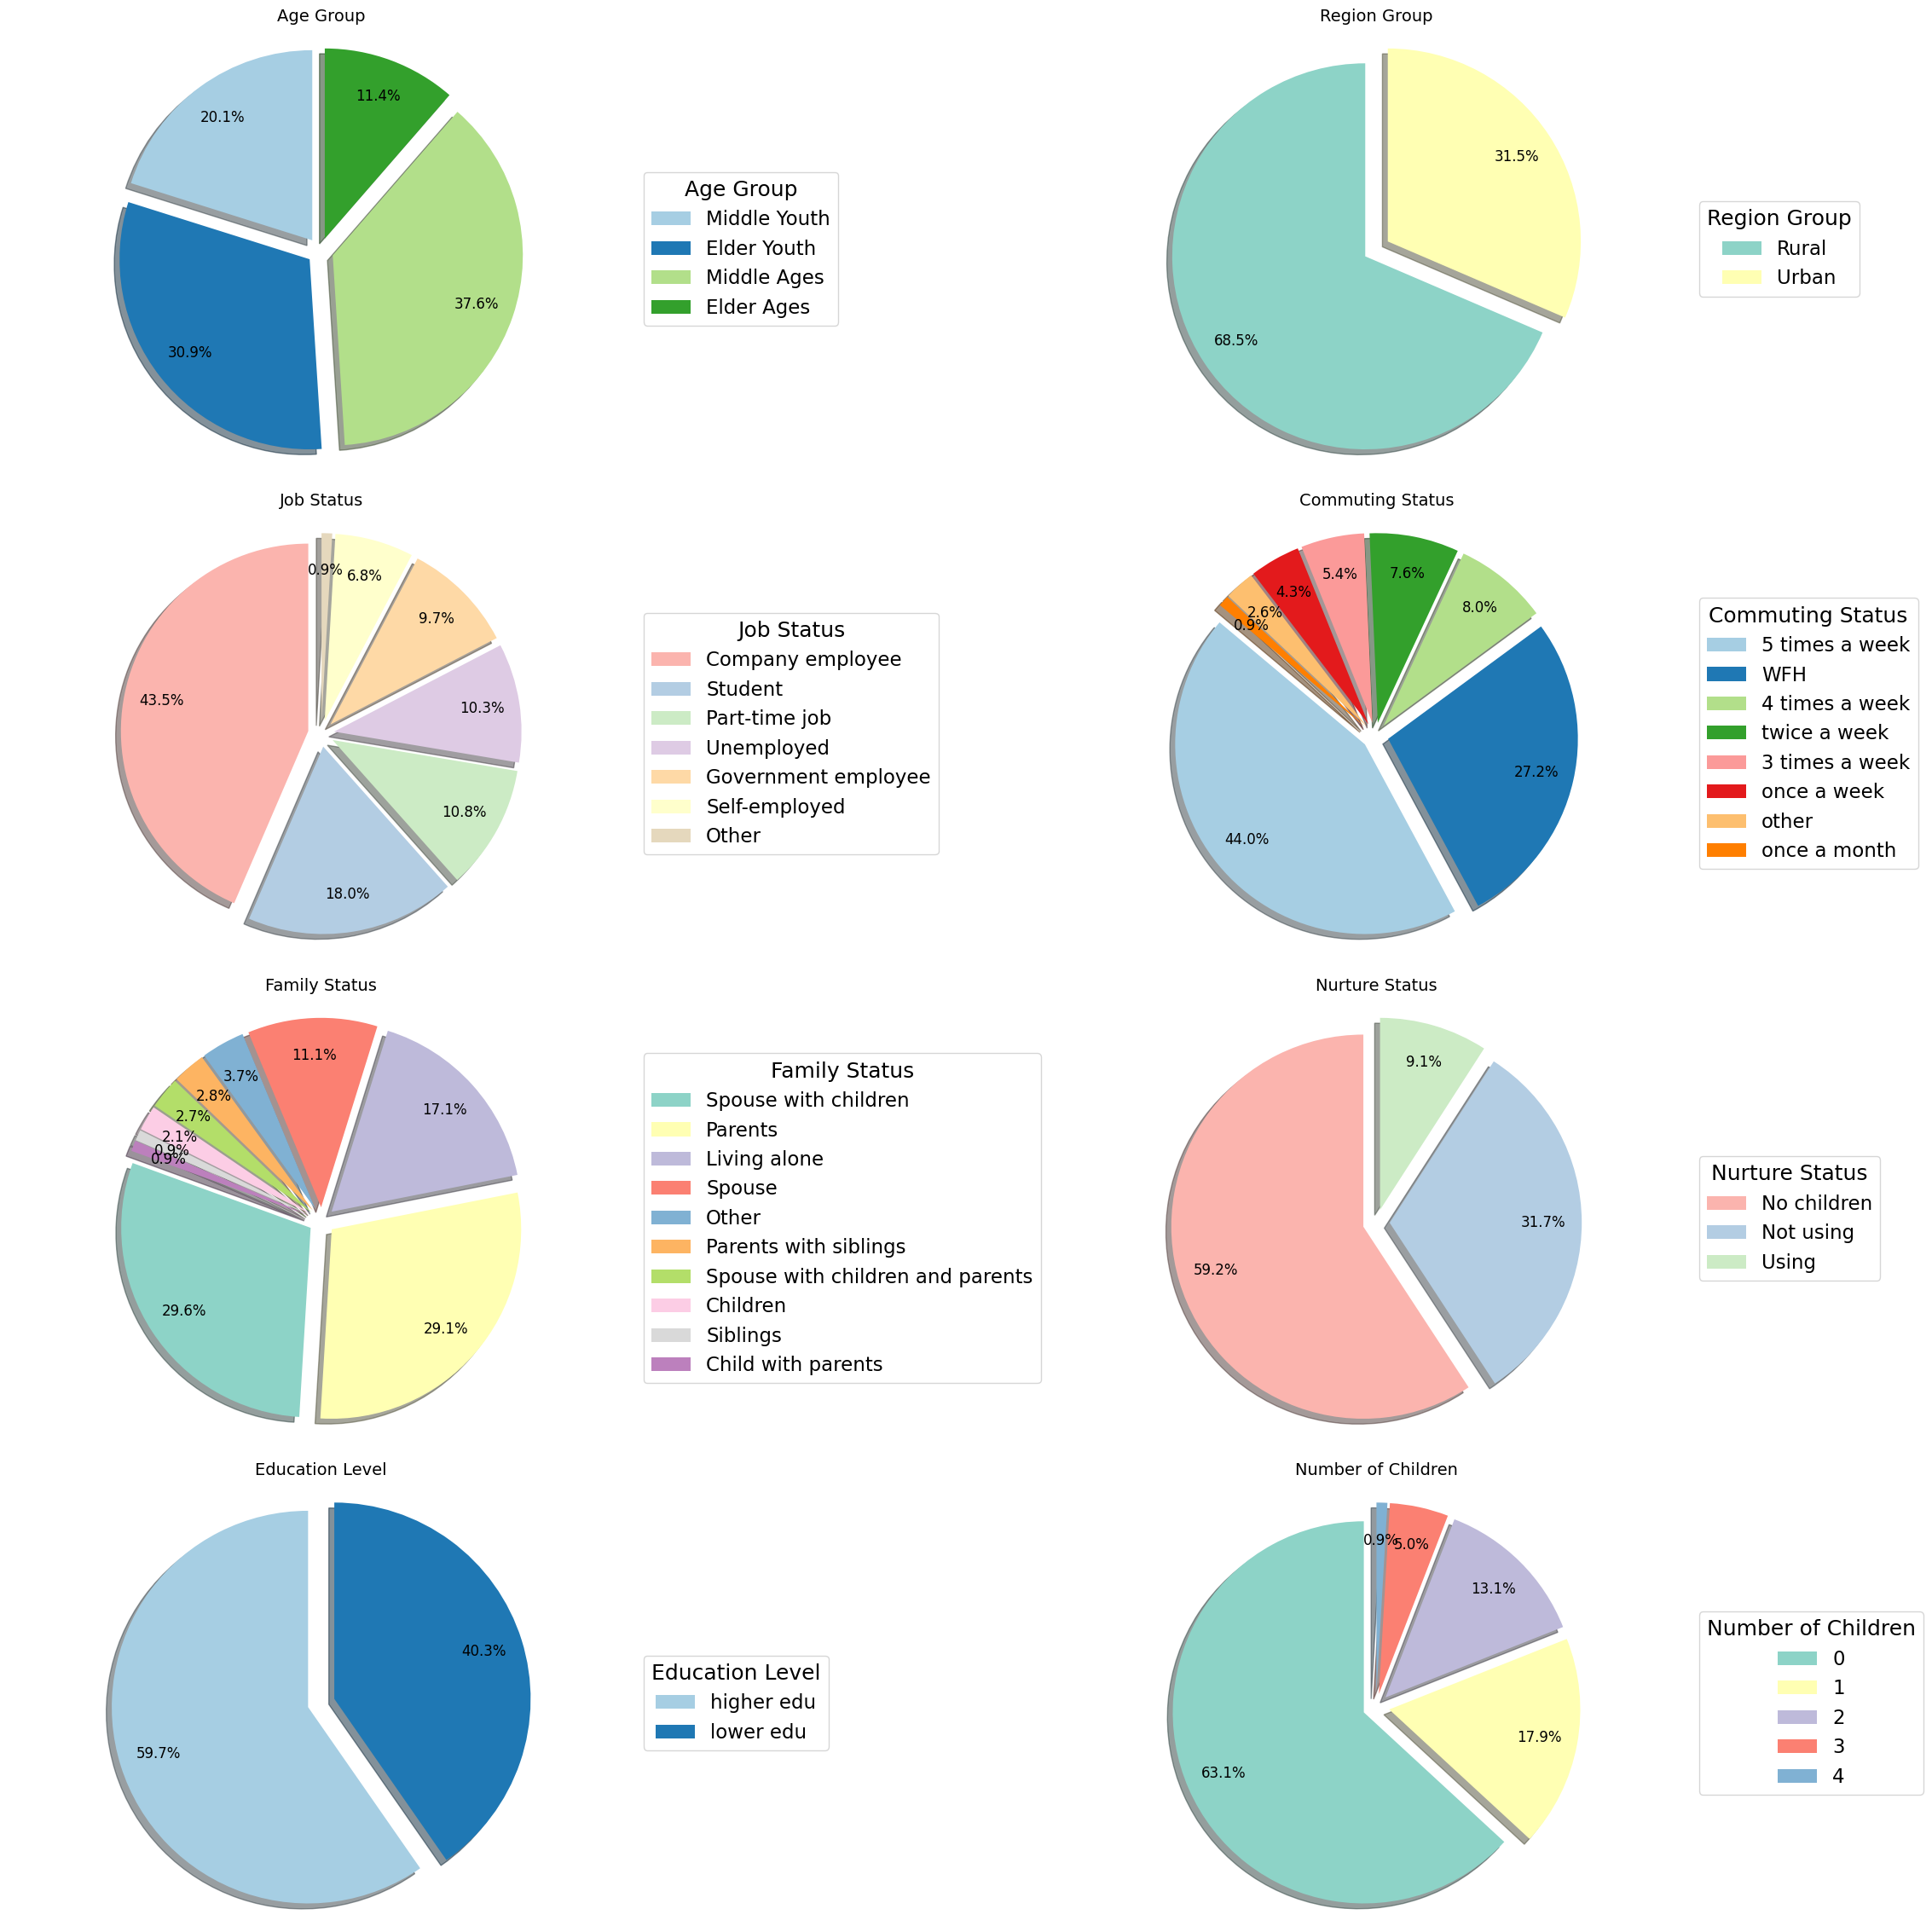

In [ ]:
# Remove NaN values from necessary columns
merged_df_clean = merged_df.dropna(subset=['age_group', 'region', 'job', 'office', 'family', 'nurture', 'education', 'number_of_children'])

# Calculate the percentage for age groups, regions, job, office, family, nurture, education, and number_of_children
age_group_percentage = merged_df_clean['age_group'].value_counts(normalize=True)
region_percentage = merged_df_clean['region'].value_counts(normalize=True)
job_percentage = merged_df_clean['job'].value_counts(normalize=True)
office_percentage = merged_df_clean['office'].value_counts(normalize=True)
family_percentage = merged_df_clean['family'].value_counts(normalize=True)
nurture_percentage = merged_df_clean['nurture'].value_counts(normalize=True)
education_percentage = merged_df_clean['education'].value_counts(normalize=True)
children_percentage = merged_df_clean['number_of_children'].value_counts(normalize=True)

# Filter out age groups with non-zero values and only keep the relevant ones
age_group_filtered = age_group_percentage.loc[['Middle Youth', 'Elder Youth', 'Middle Ages', 'Elder Ages']]

# Function to generate explode values dynamically for each pie chart
def generate_explode(data):
    return [0.07] * len(data)  # Explode each slice

# Set up 4x2 subplots for age group, region, job, office, family, nurture, education, and number_of_children
fig, axs = plt.subplots(4, 2, figsize=(23, 23))

# Define colors and explode effect for better visualization
colors_list = [plt.cm.Paired.colors, plt.cm.Set3.colors, plt.cm.Pastel1.colors]  # Use different color schemes
autopct = '%1.1f%%'  # Define the format for percentages
textprops = {'fontsize': 12}  # Define font size for better readability
pctdistance = 0.8  # Distance of the percentage from the center

# Plot Age Group Pie Chart
wedges, texts, autotexts = axs[0, 0].pie(age_group_filtered, autopct=autopct, colors=colors_list[0], explode=generate_explode(age_group_filtered), shadow=True, startangle=90, textprops=textprops, pctdistance=pctdistance)
axs[0, 0].set_title('Age Group', fontsize=14)
axs[0, 0].legend(wedges, age_group_filtered.index, title="Age Group", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot Region Pie Chart
wedges, texts, autotexts = axs[0, 1].pie(region_percentage, autopct=autopct, colors=colors_list[1], explode=generate_explode(region_percentage), shadow=True, startangle=90, textprops=textprops, pctdistance=pctdistance)
axs[0, 1].set_title('Region Group', fontsize=14)
axs[0, 1].legend(wedges, region_percentage.index, title="Region Group", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot Job Pie Chart
wedges, texts, autotexts = axs[1, 0].pie(job_percentage, autopct=autopct, colors=colors_list[2], explode=generate_explode(job_percentage), shadow=True, startangle=90, textprops=textprops, pctdistance=pctdistance)
axs[1, 0].set_title('Job Status', fontsize=14)
axs[1, 0].legend(wedges, job_percentage.index, title="Job Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot Commuting Status Pie Chart
wedges, texts, autotexts = axs[1, 1].pie(office_percentage, autopct=autopct, colors=colors_list[0], explode=generate_explode(office_percentage), shadow=True, startangle=140, textprops=textprops, pctdistance=pctdistance)
axs[1, 1].set_title('Commuting Status', fontsize=14)
axs[1, 1].legend(wedges, office_percentage.index, title="Commuting Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot Family Status Pie Chart
wedges, texts, autotexts = axs[2, 0].pie(family_percentage, autopct=autopct, colors=colors_list[1], explode=generate_explode(family_percentage), shadow=True, startangle=160, textprops=textprops, pctdistance=pctdistance)
axs[2, 0].set_title('Family Status', fontsize=14)
axs[2, 0].legend(wedges, family_percentage.index, title="Family Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot Nurture Status Pie Chart
wedges, texts, autotexts = axs[2, 1].pie(nurture_percentage, autopct=autopct, colors=colors_list[2], explode=generate_explode(nurture_percentage), shadow=True, startangle=90, textprops=textprops, pctdistance=pctdistance)
axs[2, 1].set_title('Nurture Status', fontsize=14)
axs[2, 1].legend(wedges, nurture_percentage.index, title="Nurture Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot Education Pie Chart
wedges, texts, autotexts = axs[3, 0].pie(education_percentage, autopct=autopct, colors=colors_list[0], explode=generate_explode(education_percentage), shadow=True, startangle=90, textprops=textprops, pctdistance=pctdistance)
axs[3, 0].set_title('Education Level', fontsize=14)
axs[3, 0].legend(wedges, education_percentage.index, title="Education Level", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot Number of Children Pie Chart
wedges, texts, autotexts = axs[3, 1].pie(children_percentage, autopct=autopct, colors=colors_list[1], explode=generate_explode(children_percentage), shadow=True, startangle=90, textprops=textprops, pctdistance=pctdistance)
axs[3, 1].set_title('Number of Children', fontsize=14)
axs[3, 1].legend(wedges, children_percentage.index, title="Number of Children", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ensure all pie charts are circular and layout is tight
for ax in axs.flat:
    ax.axis('equal')

plt.tight_layout()
plt.show()

# Scikit-Mobility Measurements

In [ ]:
tdf = skmob.TrajDataFrame(merged_df, latitude='latitude', longitude='longitude', datetime='datetime', user_id='device_id')
tdf['leaving_datetime'] = tdf.datetime  # this field is added to add stops later
ftdf = filtering.filter(tdf, max_speed_kmh=500.0, include_loops=True, ratio_max=1)  # Speed Noise filtering
ctdf = compression.compress(ftdf, spatial_radius_km=.2)  # Trajectory compression

In [ ]:
print("number of users:\t", len(tdf.uid.unique()))
print("number of records:\t", len(tdf))
print("number of filtered records:\t", len(ftdf))
print("number of compressed records:\t", len(ctdf))

number of users:	 123
number of records:	 366064
number of filtered records:	 358023
number of compressed records:	 15640


## Stop Detection

In [ ]:
stdf = detection.stay_locations(ctdf, stop_radius_factor=0.5, minutes_for_a_stop=20.0, spatial_radius_km=0.2, leaving_time=True) # stay location detection
cl_stdf = clustering.cluster(stdf, cluster_radius_km=0.3)  # cluster stop locations

print('Filtered compressed data shape:', ctdf.shape)
print('Stop data shape:', stdf.shape)
print('Clusters:', len(cl_stdf['cluster'].unique()))

Filtered compressed data shape: (15640, 24)
Stop data shape: (2396, 24)
Clusters: 20


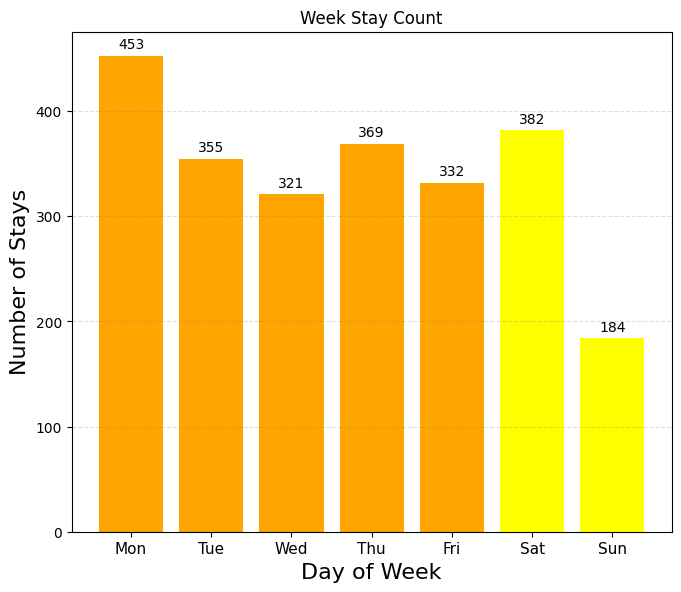

In [ ]:
df2 = (pd.to_datetime(cl_stdf['datetime'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
df2.sort_values(by=['date'], ascending=True, inplace=True)


fig = plt.figure(figsize=(6, 5))
ax = fig.add_axes([0, 0, 1, 1])
dates = df2['date']
trips = df2['count']

# Separate weekdays and weekends
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
weekends = ['Sat', 'Sun']

# Set different colors for weekdays and weekends
weekday_rect = ax.bar(dates[dates.dt.strftime('%a').isin(weekdays)], trips[dates.dt.strftime('%a').isin(weekdays)], color='orange')
weekend_rect = ax.bar(dates[dates.dt.strftime('%a').isin(weekends)], trips[dates.dt.strftime('%a').isin(weekends)], color='yellow')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Autolabel for both sets of bars
autolabel(weekday_rect)
autolabel(weekend_rect)
ax.yaxis.grid(True, linestyle='--', color='grey', alpha=.25)
ax.set_xticks(dates)

# Custom tick labels for days of the week
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.set_xticklabels(day_labels, rotation=0)
plt.ylabel('Number of Stays', fontsize=16)
plt.xlabel('Day of Week', fontsize=16)
ax.tick_params(axis='x', labelsize=11)
plt.title('Week Stay Count')
plt.show()

In [ ]:
# Ensure the 'date' column in ctdf is in datetime format
ctdf['date'] = pd.to_datetime(ctdf['date'])

# Create a date range
date_range = pd.date_range(start='2024-02-19', end='2024-02-25')

# Ensure the 'datetime' and 'date' columns in cl_stdf are in datetime format
cl_stdf['datetime'] = pd.to_datetime(cl_stdf['datetime'])
cl_stdf['date'] = pd.to_datetime(cl_stdf['datetime'].dt.date)

# Get unique user IDs
uids = cl_stdf['uid'].unique()

# Create all combinations of user IDs and dates
all_combinations = pd.MultiIndex.from_product([uids, date_range], names=['uid', 'date']).to_frame(index=False)
all_combinations['date'] = pd.to_datetime(all_combinations['date'])

# Merge and find missing records
merged = pd.merge(all_combinations, ctdf[['uid', 'date']], on=['uid', 'date'], how='left', indicator=True)

# Count missing records per day
missing_counts = merged[merged['_merge'] == 'left_only'].groupby('date').size()
print('Number of users who lost stay records:\n', missing_counts)

Number of users who lost stay records:
 date
2024-02-19     3
2024-02-20    22
2024-02-21    26
2024-02-22    22
2024-02-23    31
2024-02-24    21
2024-02-25    32
dtype: int64


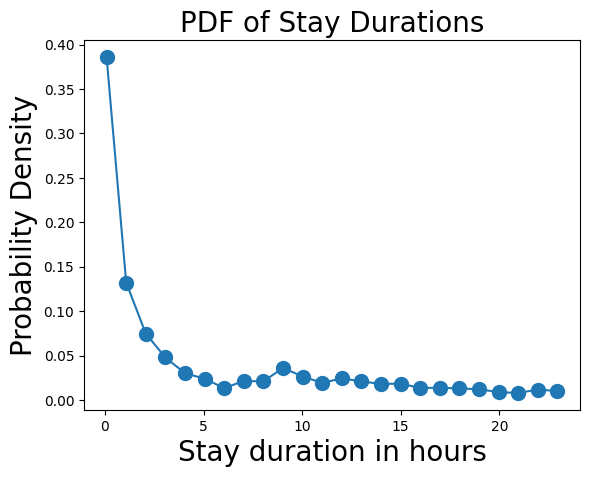

In [ ]:
def calc_stay_duration(data):
    td = data['leaving_datetime']-data['datetime']
    return td.seconds/3600
cl_stdf['stay_duration(hr)'] = cl_stdf.apply(calc_stay_duration, axis = 1)

n_bins = 24
out_Density, out_bins = np.histogram(cl_stdf['stay_duration(hr)'], bins=n_bins, density=True)
plt.plot(out_bins[:-1],out_Density,'-o', markersize=10)
plt.xlabel('Stay duration in hours',fontsize=20)
plt.ylabel('Probability Density',fontsize=20)
plt.title('PDF of Stay Durations',fontsize=20)
plt.show()

In [ ]:
cl_stdf.columns

Index(['timestamp', 'uid', 'speed', 'bearing', 'altitude', 'lat', 'lng',
       'accuracy', 'datetime', 'hour', 'date', 'weekday', 'age', 'location',
       'gender', 'job', 'office', 'family', 'nurture', 'education',
       'number_of_children', 'region', 'age_group', 'leaving_datetime',
       'cluster', 'stay_duration(hr)'],
      dtype='object')

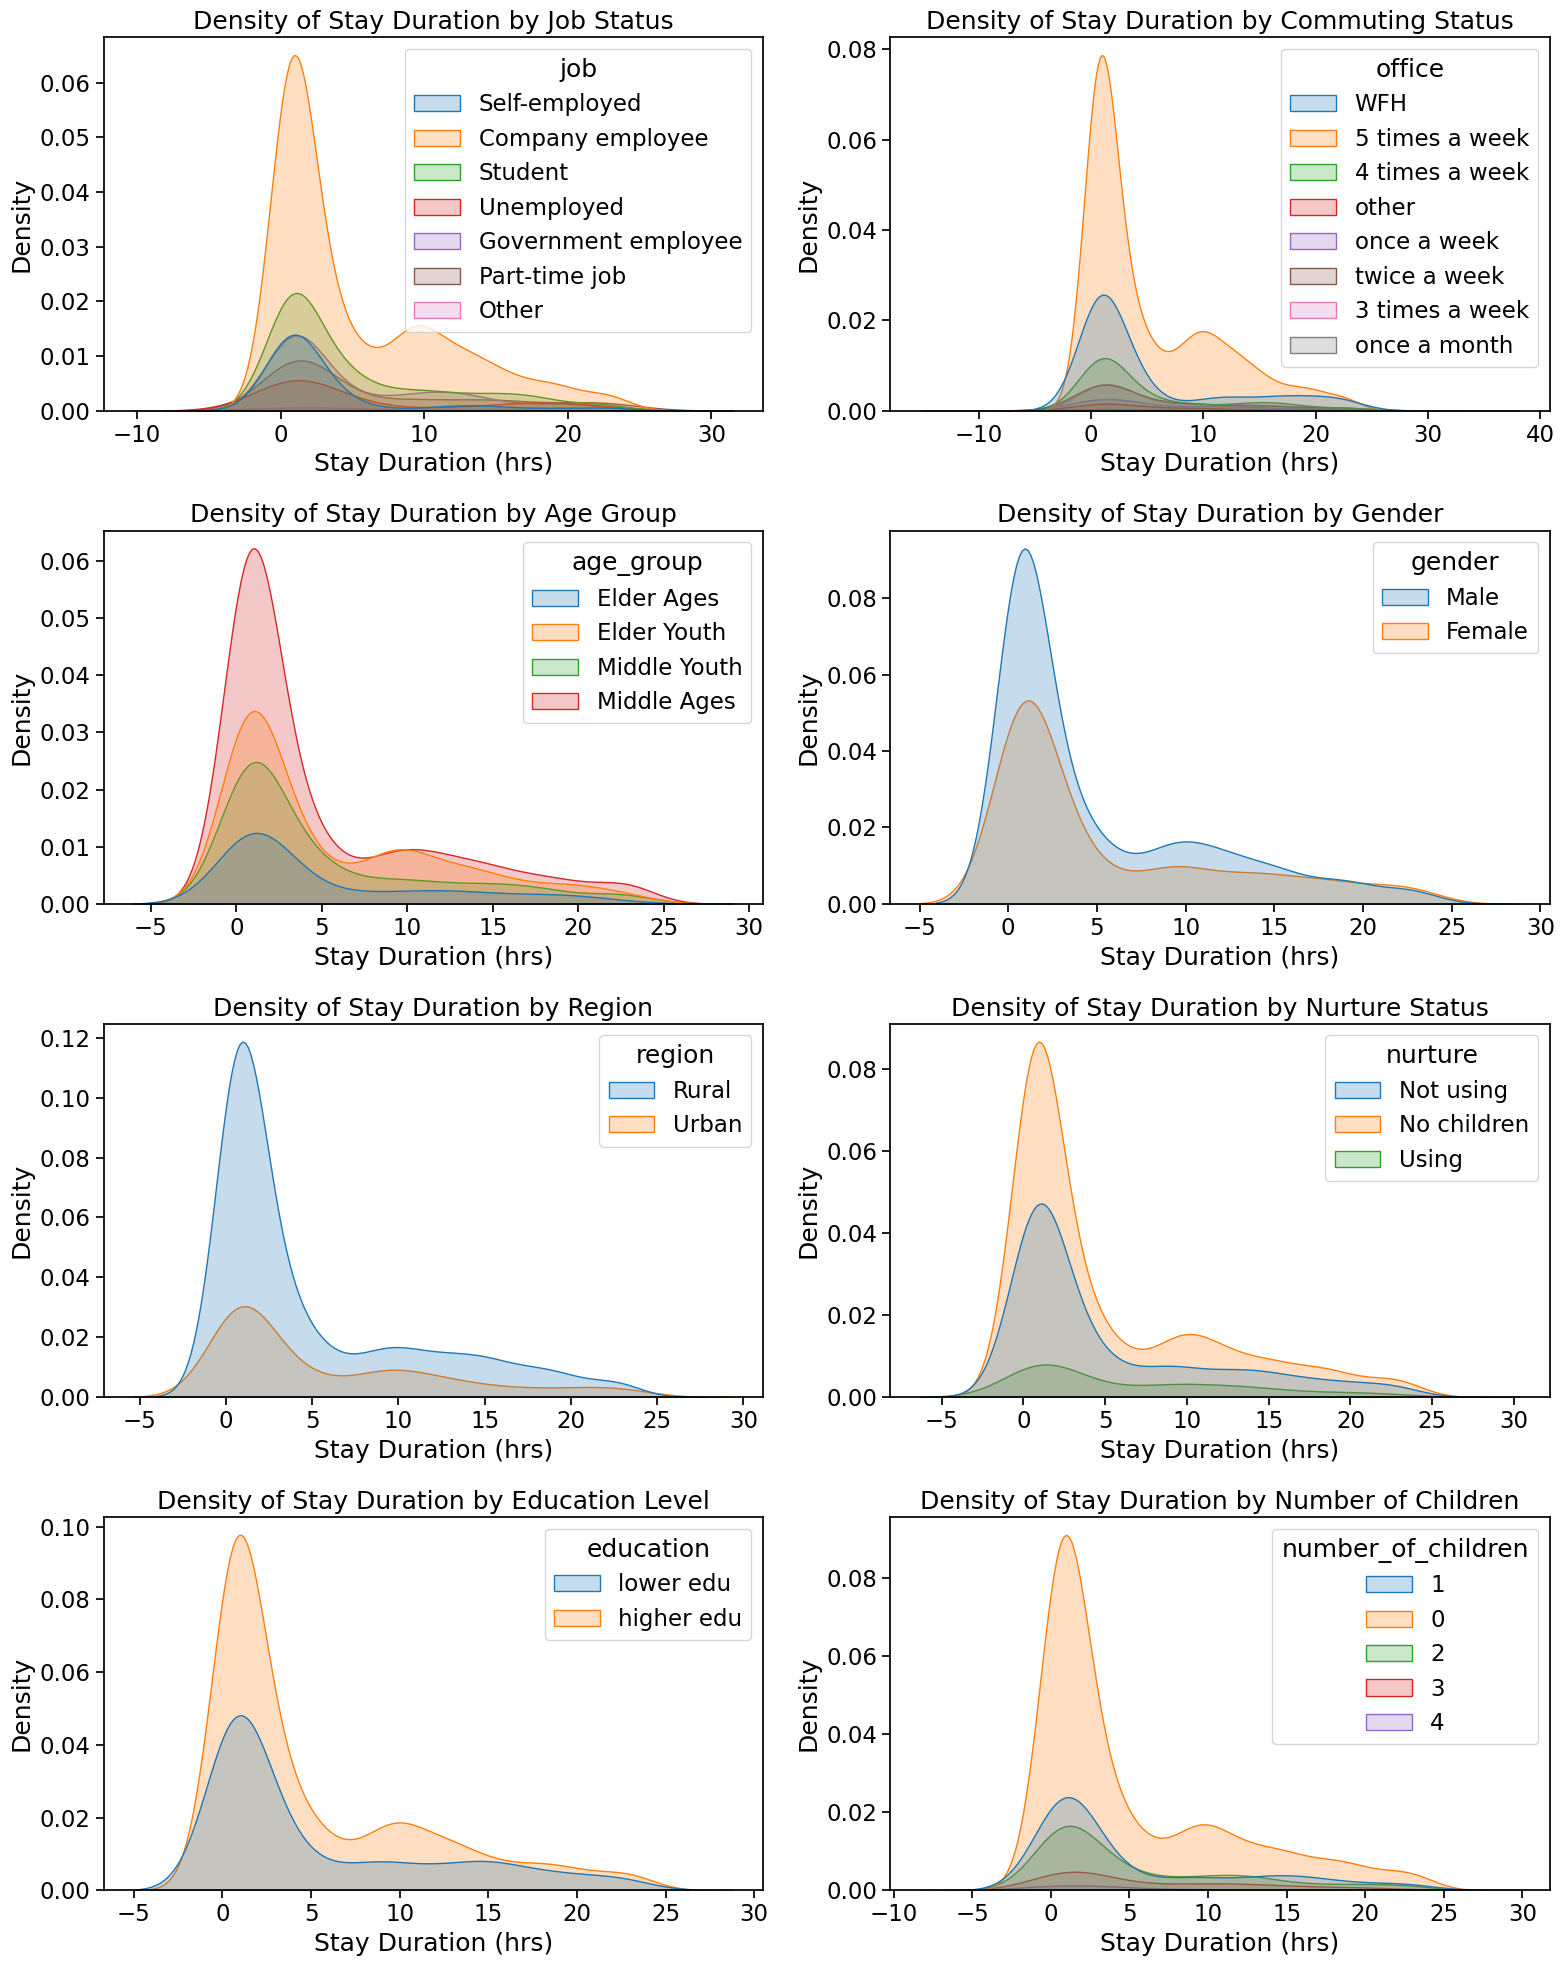

In [ ]:
# Create a 4x2 grid for the plots
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.tight_layout(pad=4.0)

# Plot 1: Density of Stay Duration by Job Status
sns.kdeplot(data=cl_stdf, x="stay_duration(hr)", hue="job", fill=True, ax=axes[0, 0])
axes[0, 0].set_title("Density of Stay Duration by Job Status")
axes[0, 0].set_xlabel("Stay Duration (hrs)")
axes[0, 0].set_ylabel("Density")

# Plot 2: Density of Stay Duration by Work Commuting Group
sns.kdeplot(data=cl_stdf, x="stay_duration(hr)", hue="office", fill=True, ax=axes[0, 1])
axes[0, 1].set_title("Density of Stay Duration by Commuting Status")
axes[0, 1].set_xlabel("Stay Duration (hrs)")
axes[0, 1].set_ylabel("Density")

# Plot 3: Density of Stay Duration by Age Group
sns.kdeplot(data=cl_stdf, x="stay_duration(hr)", hue="age_group", fill=True, ax=axes[1, 0])
axes[1, 0].set_title("Density of Stay Duration by Age Group")
axes[1, 0].set_xlabel("Stay Duration (hrs)")
axes[1, 0].set_ylabel("Density")

# Plot 4: Density of Stay Duration by Gender
sns.kdeplot(data=cl_stdf, x="stay_duration(hr)", hue="gender", fill=True, ax=axes[1, 1])
axes[1, 1].set_title("Density of Stay Duration by Gender")
axes[1, 1].set_xlabel("Stay Duration (hrs)")
axes[1, 1].set_ylabel("Density")

# Plot 5: Density of Stay Duration by Region
sns.kdeplot(data=cl_stdf, x="stay_duration(hr)", hue="region", fill=True, ax=axes[2, 0])
axes[2, 0].set_title("Density of Stay Duration by Region")
axes[2, 0].set_xlabel("Stay Duration (hrs)")
axes[2, 0].set_ylabel("Density")

# Plot 6: Density of Stay Duration by Nurture Status
sns.kdeplot(data=cl_stdf, x="stay_duration(hr)", hue="nurture", fill=True, ax=axes[2, 1])
axes[2, 1].set_title("Density of Stay Duration by Nurture Status")
axes[2, 1].set_xlabel("Stay Duration (hrs)")
axes[2, 1].set_ylabel("Density")

# Plot 7: Density of Stay Duration by Education Level
sns.kdeplot(data=cl_stdf, x="stay_duration(hr)", hue="education", fill=True, ax=axes[3, 0])
axes[3, 0].set_title("Density of Stay Duration by Education Level")
axes[3, 0].set_xlabel("Stay Duration (hrs)")
axes[3, 0].set_ylabel("Density")

# Plot 8: Density of Stay Duration by Number of Children
sns.kdeplot(data=cl_stdf, x="stay_duration(hr)", hue="number_of_children", fill=True, ax=axes[3, 1])
axes[3, 1].set_title("Density of Stay Duration by Number of Children")
axes[3, 1].set_xlabel("Stay Duration (hrs)")
axes[3, 1].set_ylabel("Density")

plt.tight_layout()
plt.show()

<ipython-input-31-a7c53d1c3b51>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lessthan50km['distance (km)'],bins=50, kde = False,norm_hist = True)


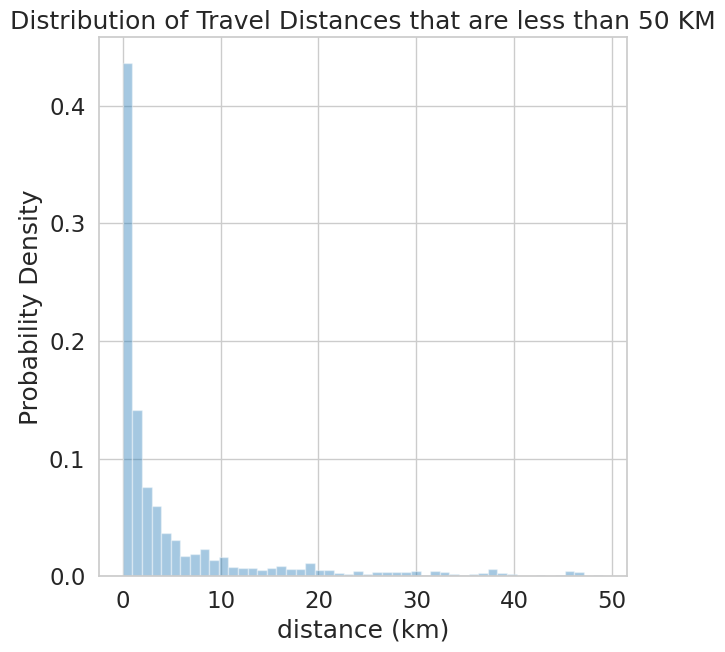

In [ ]:
dist = np.zeros([len(cl_stdf),1])
for i in range(len(cl_stdf)-1):
    dist[i+1] = getDistanceByHaversine((cl_stdf['lat'][i], cl_stdf['lng'][i]),
              (cl_stdf['lat'][i+1], cl_stdf['lng'][i+1]))
cl_stdf['distance (km)'] = dist

lessthan50km = cl_stdf[cl_stdf['distance (km)'] < 50]

f = plt.figure(figsize=(15, 7))
gs = f.add_gridspec(1, 2)
sns.set_context("notebook", font_scale=1.5)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.distplot(lessthan50km['distance (km)'],bins=50, kde = False,norm_hist = True)
    plt.title('Distribution of Travel Distances that are less than 50 KM')
    plt.ylabel('Probability Density')

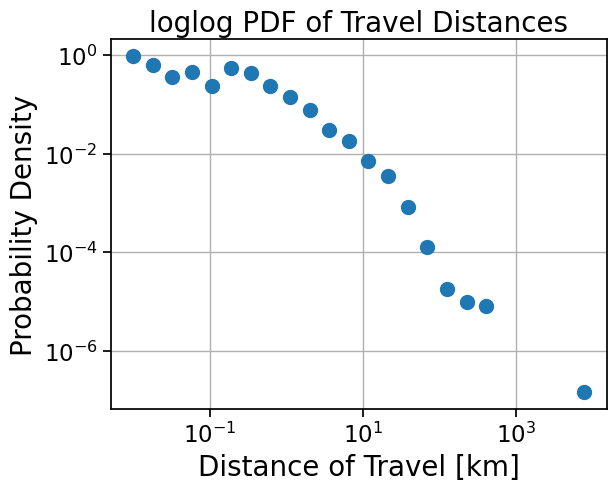

In [ ]:
fig, ax = plt.subplots()
# fig.set_size_inches((9, 7)
n_bins = 25

out_logBins = np.logspace(np.log10(min(cl_stdf['distance (km)'])+0.01),
                          np.log10(max(cl_stdf['distance (km)'])),n_bins)

out_logBinDensity, out_binedges = np.histogram(cl_stdf['distance (km)'], bins=out_logBins, density=True)

ax.loglog(out_logBins[:-1],out_logBinDensity,'o', markersize=10)

ax.set_xlabel('Distance of Travel [km]',fontsize=20)
ax.set_ylabel('Probability Density',fontsize=20)
ax.set_title('loglog PDF of Travel Distances',fontsize=20)
ax.grid(True)

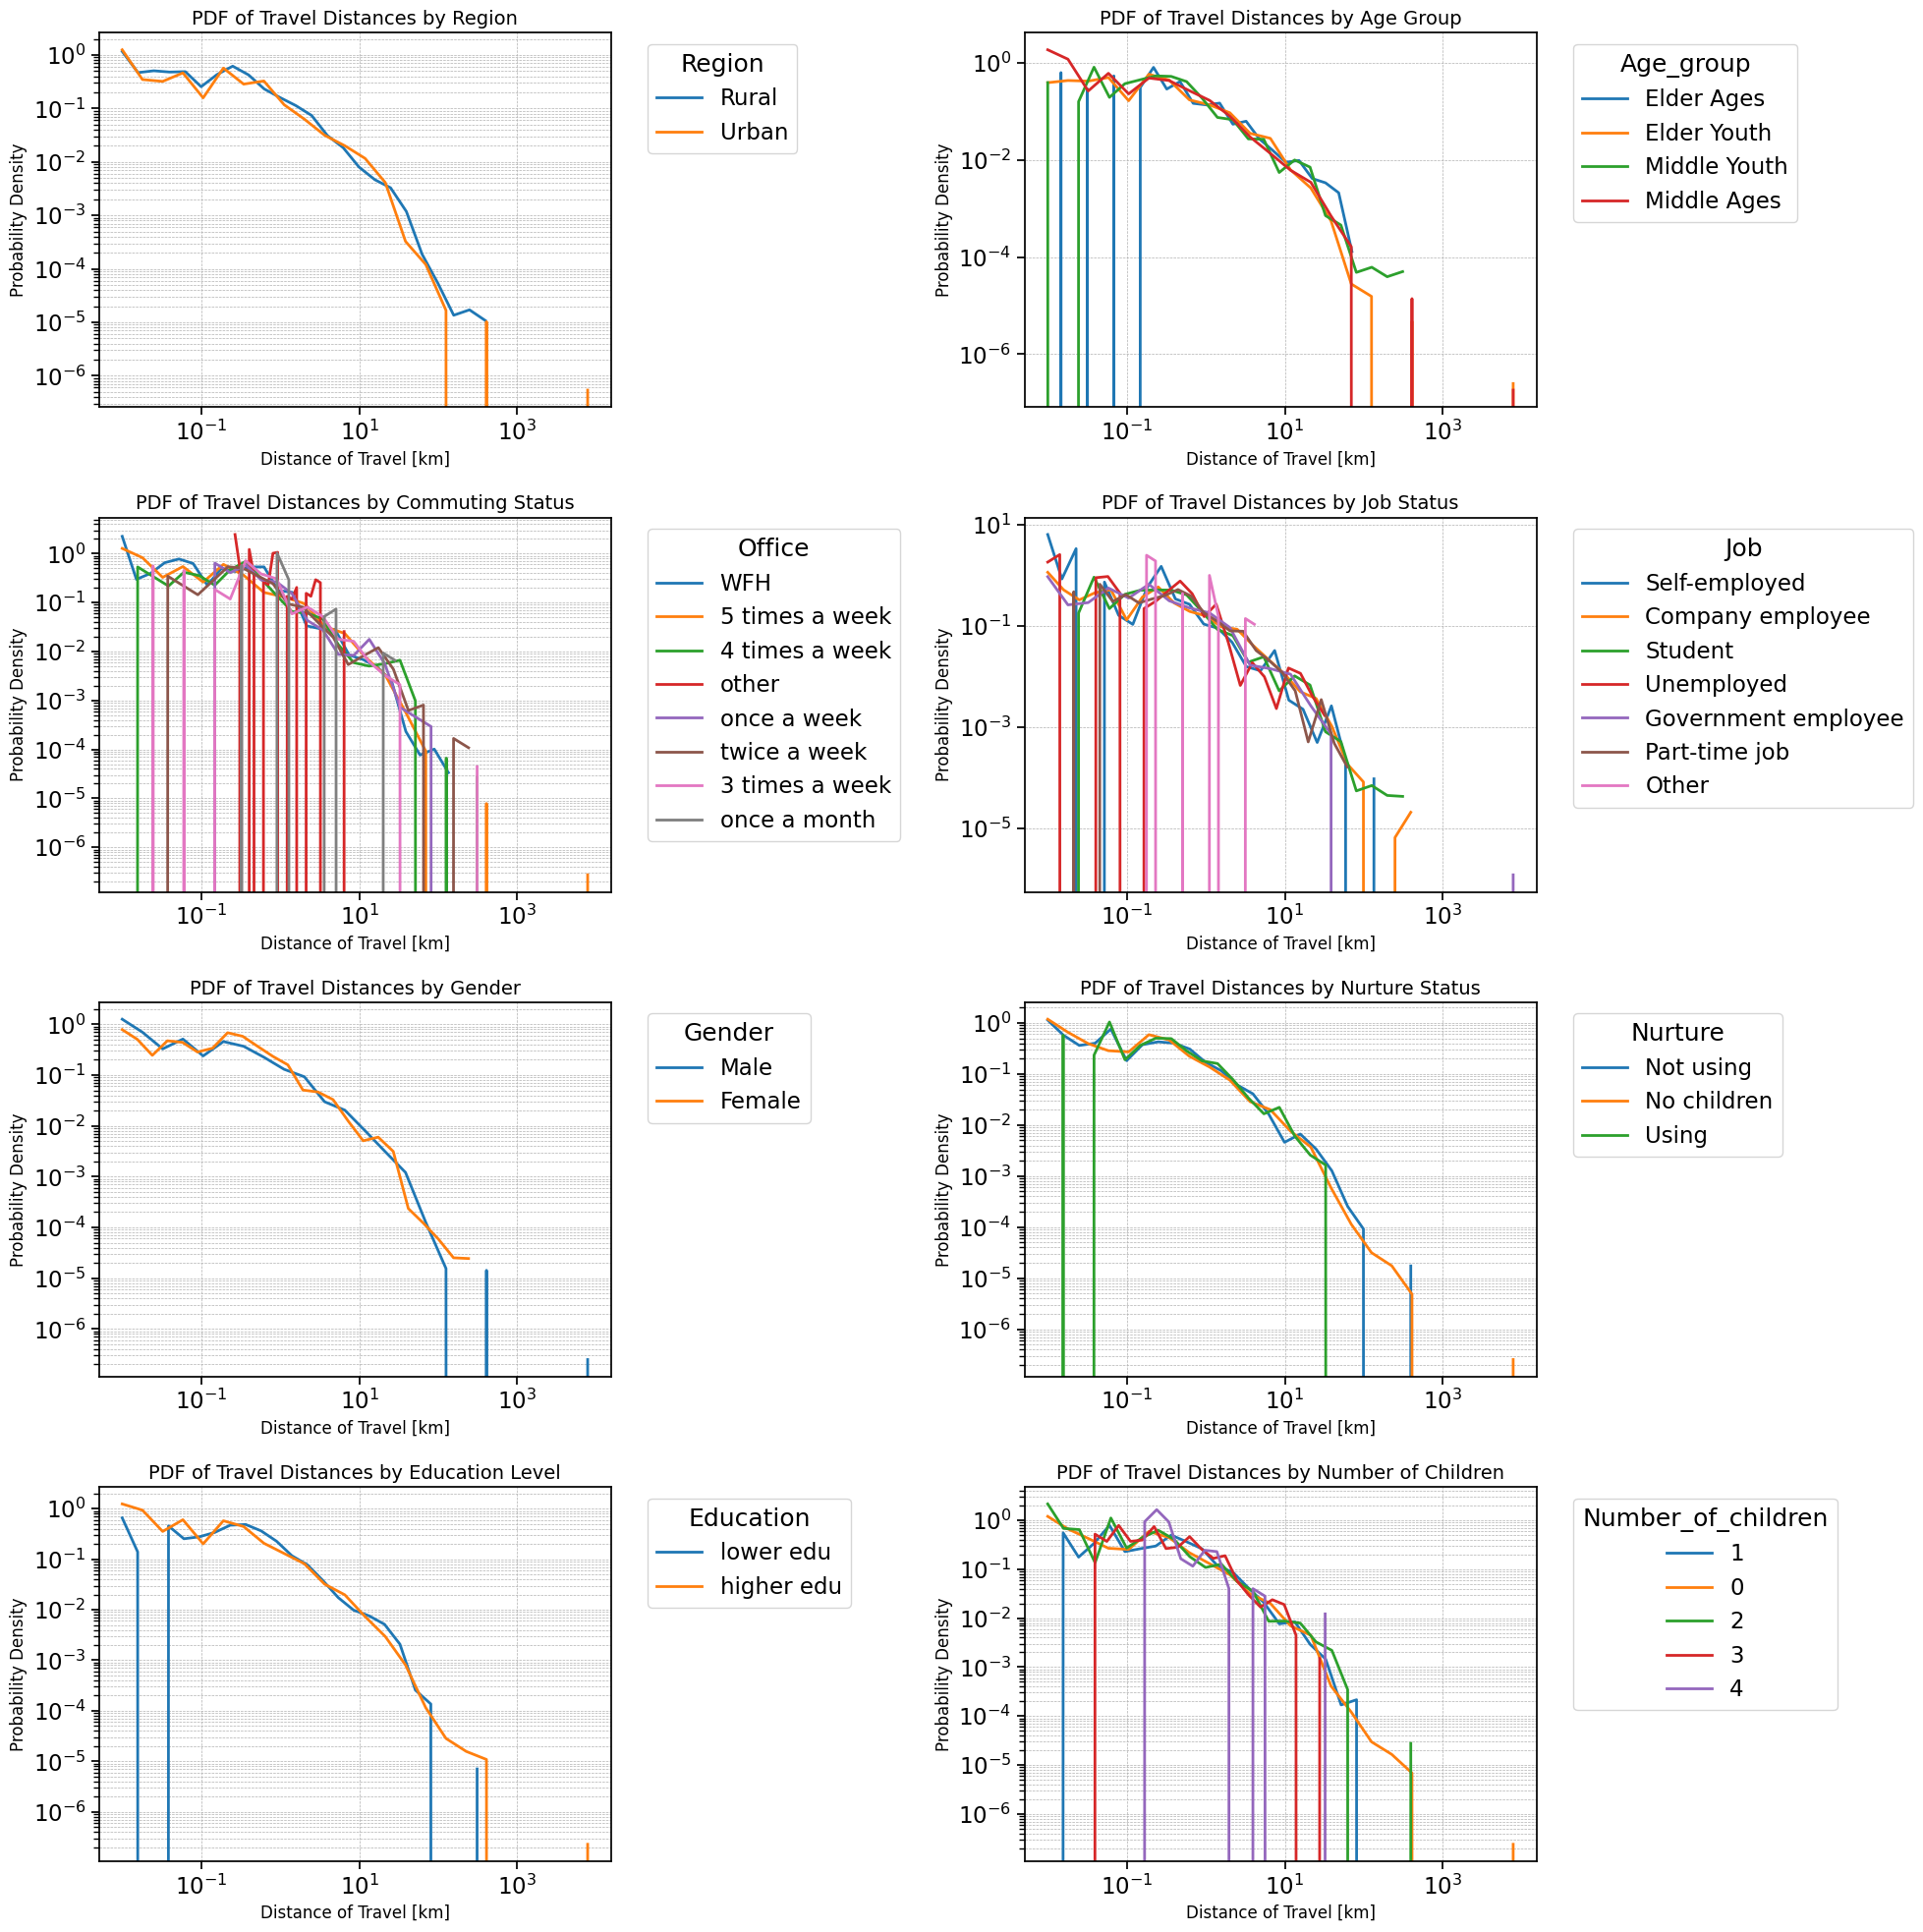

In [ ]:
# Creating the 4x2 grid for plotting
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

# Updated list of categories, including education and number of children
categories = [
    ('region', 'PDF of Travel Distances by Region'),
    ('age_group', 'PDF of Travel Distances by Age Group'),
    ('office', 'PDF of Travel Distances by Commuting Status'),
    ('job', 'PDF of Travel Distances by Job Status'),
    ('gender', 'PDF of Travel Distances by Gender'),
    ('nurture', 'PDF of Travel Distances by Nurture Status'),
    ('education', 'PDF of Travel Distances by Education Level'),
    ('number_of_children', 'PDF of Travel Distances by Number of Children')
]

n_bins = 25  # Number of bins for histograms

# Loop through each category to plot in its respective subplot
for idx, (category, title) in enumerate(categories):
    unique_groups = cl_stdf[category].unique()
    ax = axs[idx // 2, idx % 2]  # Position in the 4x2 grid

    for group in unique_groups:
        group_data = cl_stdf[cl_stdf[category] == group]['distance (km)']

        # Creating log-spaced bins and calculating the PDF
        out_logBins = np.logspace(np.log10(min(group_data) + 0.01),
                                  np.log10(max(group_data)), n_bins)
        out_logBinDensity, _ = np.histogram(group_data, bins=out_logBins, density=True)

        # Plotting the log-log plot
        ax.loglog(out_logBins[:-1], out_logBinDensity, label=group, markersize=5, linewidth=2)

    # Customizing the plot
    ax.set_xlabel('Distance of Travel [km]', fontsize=12)
    ax.set_ylabel('Probability Density', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend(title=category.capitalize(), loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjusting layout to make it more compact and visually pleasing
plt.tight_layout()
plt.show()

In [ ]:
hl_df = home_location(ctdf)
hl_df.shape

100%|██████████| 123/123 [00:01<00:00, 86.48it/s]


(123, 3)

In [ ]:
rg = radius_of_gyration(stdf).dropna()
print('min rg:', min(rg.radius_of_gyration))
print('min rg larger than 0:',min(rg.radius_of_gyration[rg.radius_of_gyration > 0.0]))
print('max rg:', max(rg.radius_of_gyration))

rg_merged = rg.merge(participant, left_on='uid', right_on='device_id', how='left')
df_filtered = rg_merged[rg_merged['radius_of_gyration'] >= 0]  # Filter for radius_of_gyration >= 0

100%|██████████| 117/117 [00:00<00:00, 359.28it/s]

min rg: 0.0
min rg larger than 0: 0.01708070510391493
max rg: 287.98612086061814


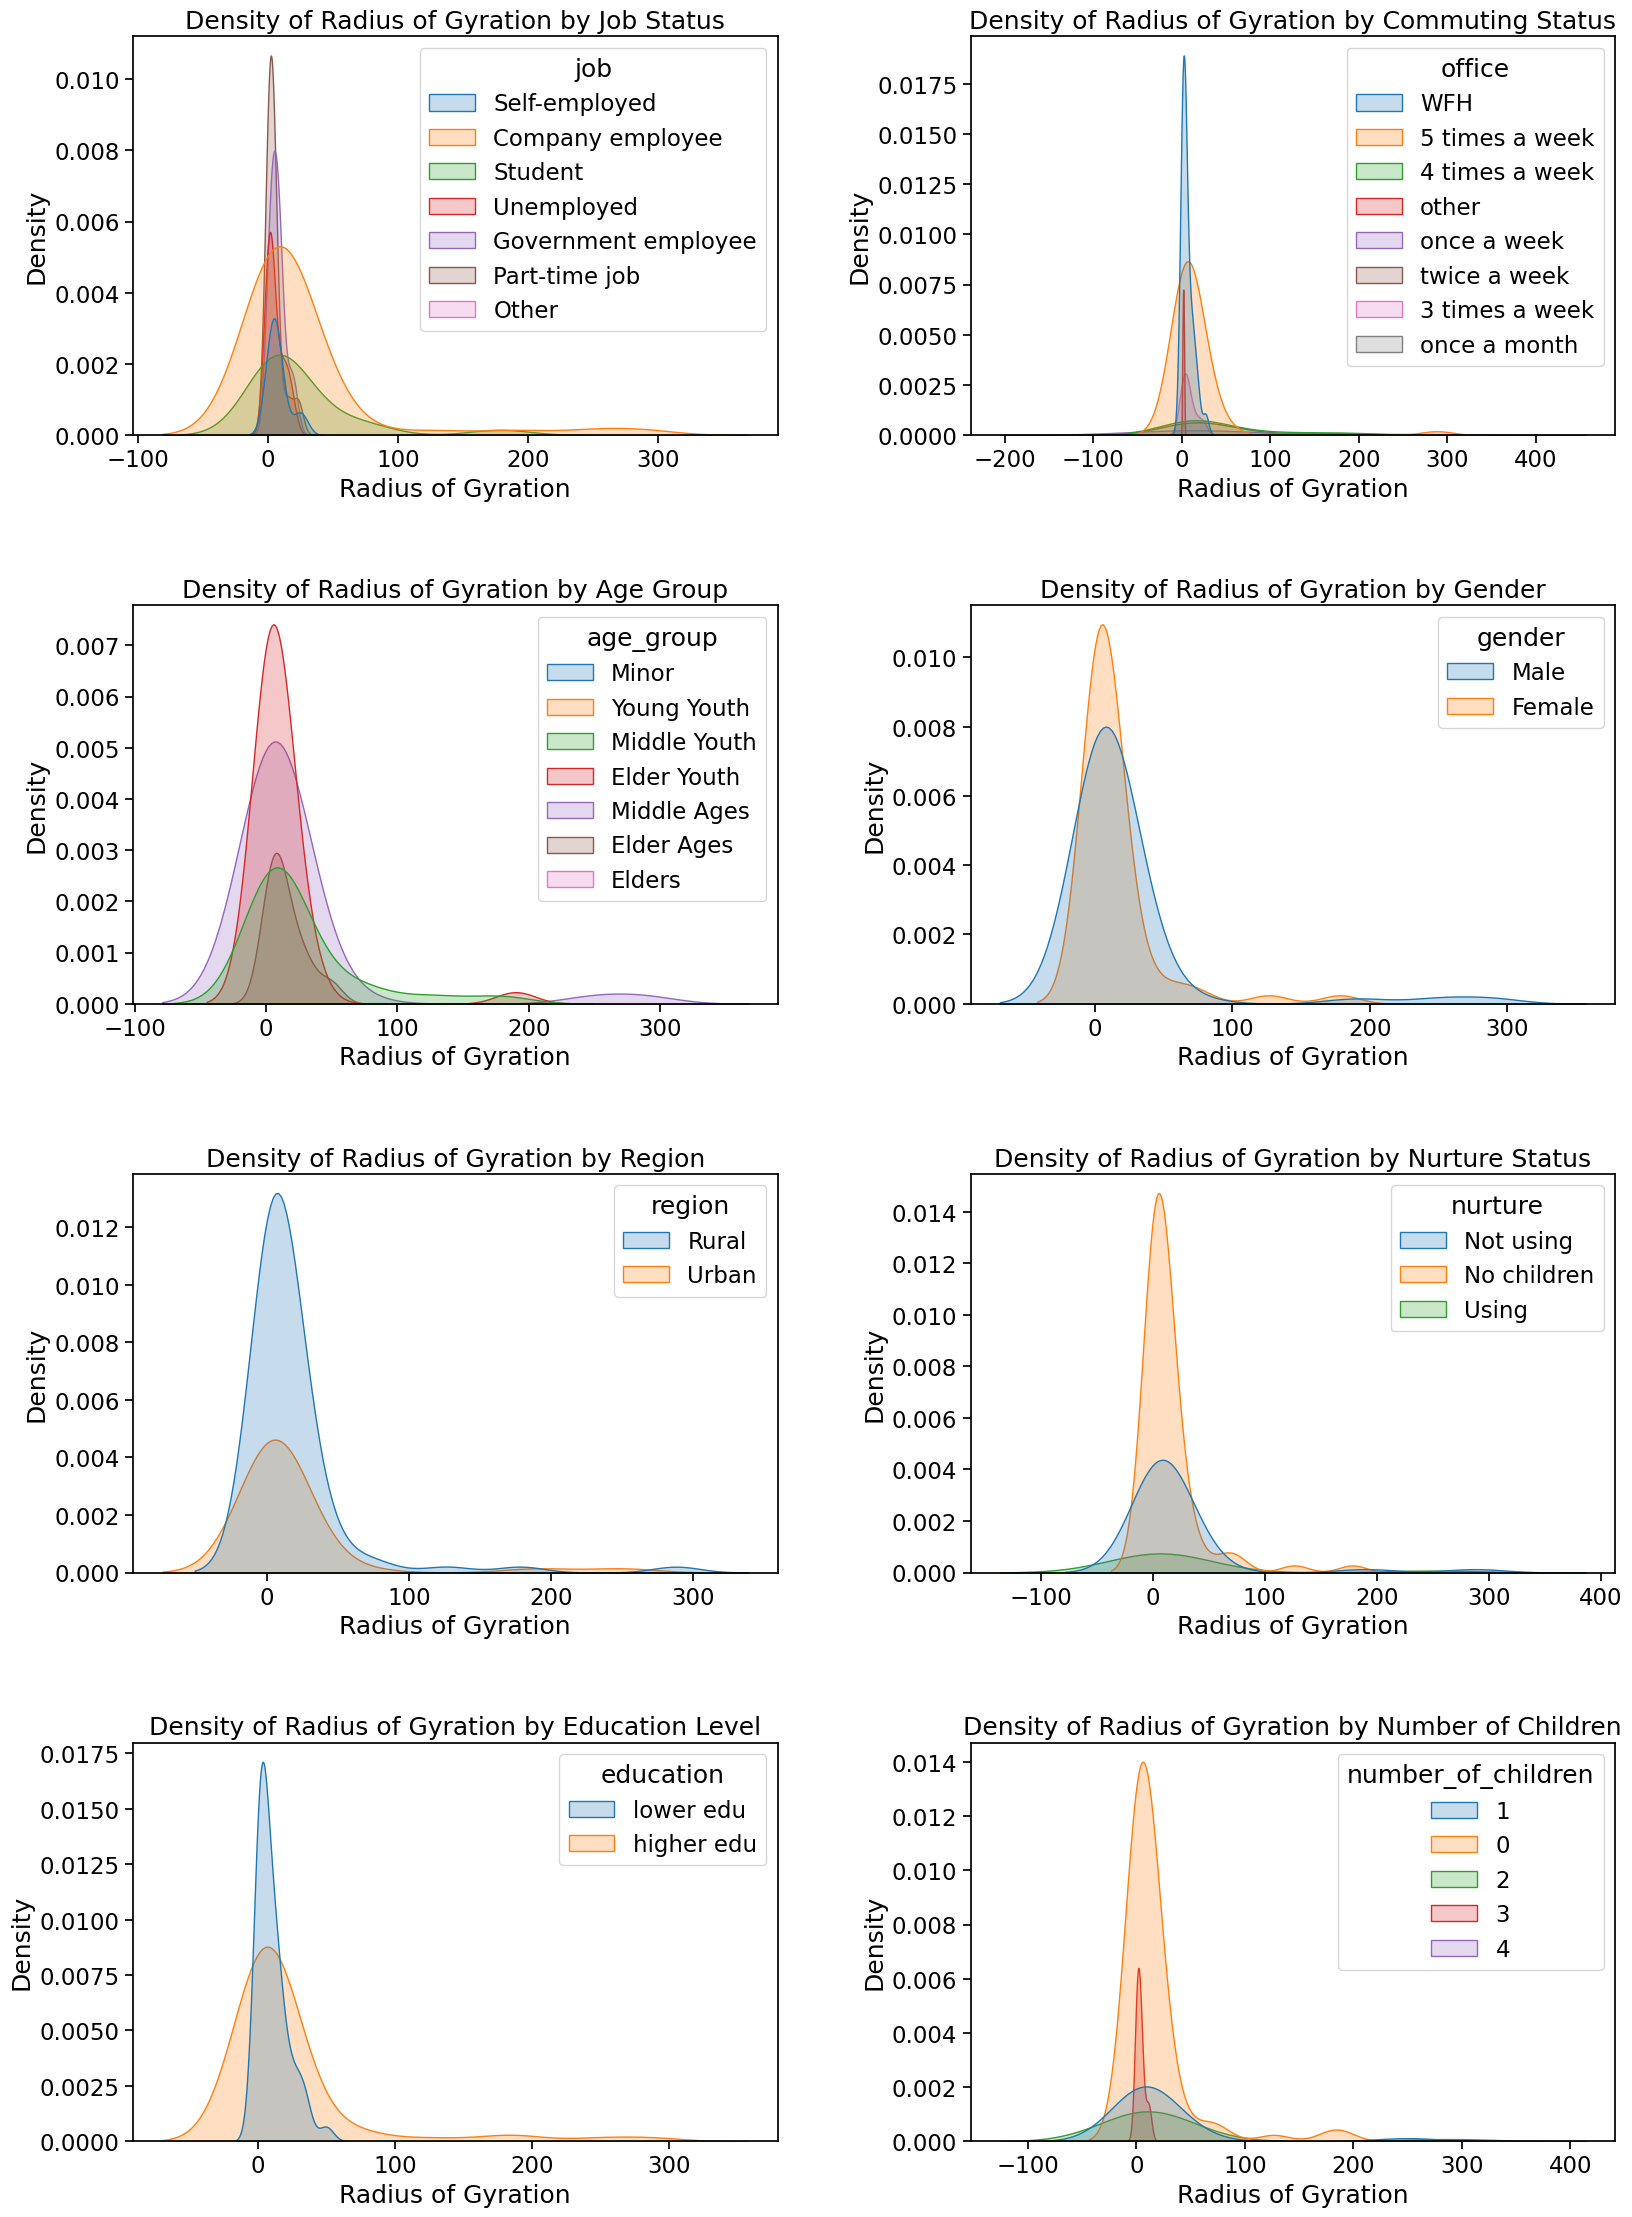

In [ ]:
# Filter out age groups with no records
age_groups_with_data = df_filtered['age_group'].value_counts()[df_filtered['age_group'].value_counts() > 0].index
df_age_filtered = df_filtered[df_filtered['age_group'].isin(age_groups_with_data)]  # Keep only groups with data

fig, axes = plt.subplots(4, 2, figsize=(18, 24))  # 4 rows, 2 columns
fig.tight_layout(pad=5.0)

# Plot 1: Radius of Gyration by Job Status
sns.kdeplot(data=df_filtered, x="radius_of_gyration", hue="job", fill=True, ax=axes[0, 0], warn_singular=False)
axes[0, 0].set_title("Density of Radius of Gyration by Job Status")
axes[0, 0].set_xlabel("Radius of Gyration")
axes[0, 0].set_ylabel("Density")

# Plot 2: Radius of Gyration by Commuting Status
sns.kdeplot(data=df_filtered, x="radius_of_gyration", hue="office", fill=True, ax=axes[0, 1], warn_singular=False)
axes[0, 1].set_title("Density of Radius of Gyration by Commuting Status")
axes[0, 1].set_xlabel("Radius of Gyration")
axes[0, 1].set_ylabel("Density")

# Plot 3: Radius of Gyration by Age Group (filtered to show only groups with data)
sns.kdeplot(data=df_age_filtered, x="radius_of_gyration", hue="age_group", fill=True, ax=axes[1, 0], warn_singular=False)
axes[1, 0].set_title("Density of Radius of Gyration by Age Group")
axes[1, 0].set_xlabel("Radius of Gyration")
axes[1, 0].set_ylabel("Density")

# Plot 4: Radius of Gyration by Gender
sns.kdeplot(data=df_filtered, x="radius_of_gyration", hue="gender", fill=True, ax=axes[1, 1], warn_singular=False)
axes[1, 1].set_title("Density of Radius of Gyration by Gender")
axes[1, 1].set_xlabel("Radius of Gyration")
axes[1, 1].set_ylabel("Density")

# Plot 5: Radius of Gyration by Region
sns.kdeplot(data=df_filtered, x="radius_of_gyration", hue="region", fill=True, ax=axes[2, 0], warn_singular=False)
axes[2, 0].set_title("Density of Radius of Gyration by Region")
axes[2, 0].set_xlabel("Radius of Gyration")
axes[2, 0].set_ylabel("Density")

# Plot 6: Radius of Gyration by Nurture
sns.kdeplot(data=df_filtered, x="radius_of_gyration", hue="nurture", fill=True, ax=axes[2, 1], warn_singular=False)
axes[2, 1].set_title("Density of Radius of Gyration by Nurture Status")
axes[2, 1].set_xlabel("Radius of Gyration")
axes[2, 1].set_ylabel("Density")

# Plot 7: Radius of Gyration by Education Level
sns.kdeplot(data=df_filtered, x="radius_of_gyration", hue="education", fill=True, ax=axes[3, 0], warn_singular=False)
axes[3, 0].set_title("Density of Radius of Gyration by Education Level")
axes[3, 0].set_xlabel("Radius of Gyration")
axes[3, 0].set_ylabel("Density")

# Plot 8: Radius of Gyration by Number of Children
sns.kdeplot(data=df_filtered, x="radius_of_gyration", hue="number_of_children", fill=True, ax=axes[3, 1], warn_singular=False)
axes[3, 1].set_title("Density of Radius of Gyration by Number of Children")
axes[3, 1].set_xlabel("Radius of Gyration")
axes[3, 1].set_ylabel("Density")

plt.show()